## Importing Necessary Library

In [1]:
#Numerical and Data Analysis
import numpy as np
import pandas as pd

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Extra
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [2]:
#Reading the application dataset
loan = pd.read_csv("application_data.csv")
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#Reading the previous applications dataset
previous = pd.read_csv("previous_application.csv")
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### Studying 'loan' Dataset 

In [4]:
loan.shape

(307511, 122)

In [5]:
loan.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
loan.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

## Missing Value Check

In [7]:
loan.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
#null percentange of each column of loan
loan.isnull().sum()/len(loan)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [9]:
#Find the columns with null percentange greater than 40%
(loan.isnull().sum()/len(loan)*100)>40
#Here, 40% is used because it is the industrial standard

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     False
AMT_REQ_CREDIT_BUREAU_WEEK    False
AMT_REQ_CREDIT_BUREAU_MON     False
AMT_REQ_CREDIT_BUREAU_QRT     False
AMT_REQ_CREDIT_BUREAU_YEAR    False
Length: 122, dtype: bool

In [10]:
loan.drop(columns=loan.columns[(loan.isnull().sum()/len(loan)*100)>40],axis=1,inplace=True)
#We are dropping the columns with high percentage (40%) of missing values because making use of columns with more missing 
#values makes the data non-reliable and so it is better to drop it to make the data reliable.

In [11]:
#Checking the number of columns left after dropping columns with more than 40% null values
loan.isnull().shape

(307511, 73)

In [12]:
loan.head()
#So, we have 73 columns left

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Segmentation of Columns

In [13]:
#The 73 columns is segmented here to numerical columns(num_cols), categorical columns(cat_cols) and extra columns(extra_cols) 
#to make the data easier to handle and drop the extra columns.

In [14]:
#Finding out the columns in the dataset
loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [15]:
#The segmentation happens here
num_cols=['SK_ID_CURR','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH',
          'REGION_POPULATION_RELATIVE','DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
cat_cols=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
          'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']
extra_cols=['NAME_TYPE_SUITE','DAYS_REGISTRATION','DAYS_ID_PUBLISH','FLAG_MOBIL',
            'FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT',
            'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
            'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
            'LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
            'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',
            'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
            'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',
            'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
            'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
            'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
len(num_cols)+len(cat_cols)+len(extra_cols)
#checking weather all the data has been categorized into three columns

73

In [16]:
#dropping all the extra columns (extra_cols)
loan=loan.drop(extra_cols,axis=1)

In [17]:
#Checking how many columns we have left after dropping the extra columns
loan.shape

(307511, 21)

In [18]:
loan.head()
#So we have 21 columns left which can be taken for further analysis

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,Laborers,1.0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,Core staff,2.0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,Laborers,1.0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,Laborers,2.0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,Core staff,1.0,Religion


In [19]:
#Checking the column heads of the 21 columns we have left
loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE'],
      dtype='object')

### Checking the datatypes

In [20]:
#The datatypes of each of the columns are looked at here
loan.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
ORGANIZATION_TYPE              object
dtype: object

In [21]:
#Here, 10 of the columns are object type. They are supposed to be categorical columns. So, converting the columns to categories.
categorical_cols=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                  'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE']
for col in categorical_cols:
    loan[col] = loan[col].astype('category')

In [22]:
#The id os te customer 'SK_ID_CURR' is integer data type, but it holds id number of customers, and this variable cannot be 
#changed, so we will convert it to object datatype
loan['SK_ID_CURR'] = loan['SK_ID_CURR'].astype('object')

In [23]:
#Checking the datatypes again
loan.dtypes

SK_ID_CURR                      object
TARGET                           int64
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_INCOME_TYPE              category
NAME_EDUCATION_TYPE           category
NAME_FAMILY_STATUS            category
NAME_HOUSING_TYPE             category
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
OCCUPATION_TYPE               category
CNT_FAM_MEMBERS                float64
ORGANIZATION_TYPE             category
dtype: object

## Missing Value Check

In [24]:
#Here the missing values in each of the 21 columns are checked because the analysis will be affected if we proceed with missing
#values.

In [25]:
#Here the percentage of missig values in each column is checked
100*loan.isnull().mean()

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
ORGANIZATION_TYPE              0.000000
dtype: float64

In [26]:
#The 'OCCUPATION_TYPE' has the highest number of missing values and the columns like 'AMT_ANNUITY','ANT_GOODS_PRICE',
#'CNT_FAMILY_MEMBERS' also has some missing values. We have to impute these values.

In [27]:
#There are normally two methods followed for missing values imputation:
##For Numerical column --> Mean/Median (Median is always better approach bcoz median is least affected with outliers)
##For Categorical column --> Mode/create a new category (Missing)

In [28]:
#Here the column occupation type, which is a categorical column has missing values. 
#We can use the mode value to impute the missing values in the column.
mod=loan["OCCUPATION_TYPE"].mode()[0]
loan["OCCUPATION_TYPE"]=loan["OCCUPATION_TYPE"].fillna(mod)

In [29]:
##For the columns "AMT_ANNUITY", "AMT_GOODS_PRICE" & "CNT_FAM_MEMBERS" we can impute the missing values with median since
#they are numerical values.
med1=loan["AMT_ANNUITY"].median()
loan["AMT_ANNUITY"]=loan["AMT_ANNUITY"].fillna(med1)

med2=loan["AMT_GOODS_PRICE"].median()
loan["AMT_GOODS_PRICE"]=loan["AMT_GOODS_PRICE"].fillna(med2)

med3=loan["CNT_FAM_MEMBERS"].median()
loan["CNT_FAM_MEMBERS"]=loan["CNT_FAM_MEMBERS"].fillna(med3)

In [30]:
# Checking the missing values in each column again
100*loan.isnull().mean()

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
CNT_CHILDREN                  0.0
AMT_INCOME_TOTAL              0.0
AMT_CREDIT                    0.0
AMT_ANNUITY                   0.0
AMT_GOODS_PRICE               0.0
NAME_INCOME_TYPE              0.0
NAME_EDUCATION_TYPE           0.0
NAME_FAMILY_STATUS            0.0
NAME_HOUSING_TYPE             0.0
REGION_POPULATION_RELATIVE    0.0
DAYS_BIRTH                    0.0
DAYS_EMPLOYED                 0.0
OCCUPATION_TYPE               0.0
CNT_FAM_MEMBERS               0.0
ORGANIZATION_TYPE             0.0
dtype: float64

In [31]:
#Thus, the missing values have been taken care of and the percentage of missing values in all the columns have become zero.

## Value Checks

In [32]:
#Value checks is important because we get an understanding of what values are present in each of the columns and any 
#discrepencies in the values can be taken care of. Each of the columns are considered one by one. 

In [33]:
#Value checks for 'NAME_CONTRACT_TYPE'
loan['NAME_CONTRACT_TYPE'].value_counts(normalize=True)*100

NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64

In [34]:
#There are only two types of loans: Cash loans and Revolving loans. Cash loans are more than Revolving Loans.

In [35]:
#Value checks for 'CODE_GENDER'
loan['CODE_GENDER'].value_counts(normalize=True)*100

CODE_GENDER
F      65.834393
M      34.164306
XNA     0.001301
Name: proportion, dtype: float64

In [36]:
#The gener types are Female and Male and there is one more 'XNA' which has to be taken care of. Female is more than Male.

In [37]:
#XNA values are very low and Female is the mode value. So lets replace XNA with gender 'F'
loan.loc[loan.CODE_GENDER == 'XNA', 'CODE_GENDER'] = 'F'
#Doing vaue checks again to check
loan['CODE_GENDER'].value_counts(normalize=True)*100

CODE_GENDER
F      65.835694
M      34.164306
XNA     0.000000
Name: proportion, dtype: float64

In [38]:
#Value checks for 'FLAG_OWN_CAR'
loan['FLAG_OWN_CAR'].value_counts(normalize=True)*100

FLAG_OWN_CAR
N    65.989184
Y    34.010816
Name: proportion, dtype: float64

In [39]:
#66% of the clients don't own a car and 34% owns a car. No abnormal values here.

In [40]:
#Value checks for 'FLAG_OWN_REALTY'
loan['FLAG_OWN_REALTY'].value_counts(normalize=True)*100

FLAG_OWN_REALTY
Y    69.367275
N    30.632725
Name: proportion, dtype: float64

In [41]:
#Almost 69% of the clients of the people own some property and 31% don't own a property. No abmormal values here.

In [42]:
#Value checks for 'CNT_CHIDREN'
loan['CNT_CHILDREN'].value_counts(normalize=True)*100

CNT_CHILDREN
0     70.036844
1     19.875387
2      8.698551
3      1.208737
4      0.139507
5      0.027316
6      0.006829
7      0.002276
14     0.000976
8      0.000650
9      0.000650
12     0.000650
10     0.000650
19     0.000650
11     0.000325
Name: proportion, dtype: float64

In [43]:
#70% of the clients don't have children and a small percentage of clients have more than 14 children which is not normal but ok.

In [44]:
#Value checks for 'ANT_INCOME_TOTAL'
loan['AMT_INCOME_TOTAL'].value_counts(normalize=True)*100

AMT_INCOME_TOTAL
135000.0    11.625600
112500.0    10.087119
157500.0     8.635789
180000.0     8.038412
90000.0      7.311283
              ...    
117324.0     0.000325
64584.0      0.000325
142897.5     0.000325
109170.0     0.000325
113062.5     0.000325
Name: proportion, Length: 2548, dtype: float64

In [45]:
#Since it is hard to understand anything based on these continous values, we will make bins
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
loan['AMT_INCOME_RANGE'] = pd.cut(loan['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [46]:
#Value checks for 'ANT_INCOME_TOTAL' again with bins
loan['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100000-250000        66.350472
0-100000             20.714056
250000-500000        12.056804
500000-750000         0.669244
750000-1000000        0.128125
1000000-1250000       0.032194
1250000-1500000       0.021788
2000000-2250000       0.007805
1500000-1750000       0.006504
1750000-2000000       0.006504
5000000 and above     0.001626
4250000-4500000       0.001301
3000000-3250000       0.000650
3250000-3500000       0.000650
3500000-3750000       0.000650
3750000-4000000       0.000650
2250000-2500000       0.000325
2750000-3000000       0.000325
2500000-2750000       0.000325
4000000-4250000       0.000000
4500000-4750000       0.000000
4750000-5000000       0.000000
Name: proportion, dtype: float64

In [47]:
#66% of the clients have 1 lakh to 2.5 lakh income.

In [48]:
#Value checks for 'AMT_CREDIT'
loan['AMT_CREDIT'].value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
487318.5     0.000325
630400.5     0.000325
1875276.0    0.000325
1395895.5    0.000325
1391130.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [49]:
#Since it is hard to understand the credit amount on these continous values, we will make bins
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,5000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000 and above']
loan['AMT_CREDIT_RANGE'] = pd.cut(loan['AMT_CREDIT'],bins,labels=ranges)

In [50]:
#Value checks for 'AMT_CREDIT' agan with bins
loan['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
250000-500000        29.311147
500000-750000        21.168023
100000-250000        17.298243
750000-1000000       14.015434
1000000-1250000       8.154180
1250000-1500000       4.602762
0-100000              1.952450
1500000-1750000       1.834731
1750000-2000000       1.003216
2000000-2250000       0.459171
2500000-2750000       0.103411
2250000-2500000       0.083249
3000000-3250000       0.003902
2750000-3000000       0.003577
4000000 and above     0.003252
3250000-3500000       0.001951
3500000-3750000       0.000650
3750000-4000000       0.000650
Name: proportion, dtype: float64

In [51]:
#29% of the people have loans between 2.5 lakh to 5 lakh. Then comes 5 lakh to 7.5 lakh range.

In [52]:
#Value checks for 'AMT_ANNUITY'
loan['AMT_ANNUITY'].value_counts(normalize=True)*100

AMT_ANNUITY
9000.0      2.076348
13500.0     1.793107
6750.0      0.741112
10125.0     0.661765
37800.0     0.520957
              ...   
79902.0     0.000325
106969.5    0.000325
60885.0     0.000325
59661.0     0.000325
77809.5     0.000325
Name: proportion, Length: 13672, dtype: float64

In [53]:
#Since it is hard to understand the values based on these continuos values, we will make bins
bins = [0,10000,25000,50000,75000,100000, 125000, 150000, 175000, 200000, 225000,250000,
        275000,300000]
ranges = ['0-10000','10000-25000','25000-50000','50000-75000','75000-100000', '100000-125000',
          '125000-150000','150000-175000','175000-200000','200000-225000','225000-250000',
          '250000-275000','275000 and above']
loan['AMT_ANNUITY_RANGE'] = pd.cut(loan['AMT_ANNUITY'],bins,labels=ranges)

In [54]:
#Value checks for 'AMT_CREDIT' again with bins
loan['AMT_ANNUITY_RANGE'].value_counts(normalize=True)*100

AMT_ANNUITY_RANGE
10000-25000         42.793916
25000-50000         42.709041
0-10000              7.571436
50000-75000          6.283027
75000-100000         0.478357
100000-125000        0.111216
125000-150000        0.030893
200000-225000        0.011057
150000-175000        0.007805
175000-200000        0.002602
225000-250000        0.000325
250000-275000        0.000325
275000 and above     0.000000
Name: proportion, dtype: float64

In [55]:
#Almost 85% of the annuity range from 10000 to 50000. 

In [56]:
#Value checks for 'AMT_GOODS_PRICE' again with bins
loan['AMT_GOODS_PRICE'].value_counts(normalize=True)*100

AMT_GOODS_PRICE
450000.0     8.552540
225000.0     8.221495
675000.0     8.117433
900000.0     5.013154
270000.0     3.716290
               ...   
1265751.0    0.000325
503266.5     0.000325
810778.5     0.000325
666090.0     0.000325
743863.5     0.000325
Name: proportion, Length: 1002, dtype: float64

In [57]:
#Since it is hard to determine anything based on these continuos values, we will make bins
bins = [0,100000,250000,500000,750000,1000000, 1250000, 1500000, 1750000, 2000000, 2250000,2500000,
        2750000,3000000,3250000,3500000,3750000,4000000,4250000,4500000,4750000,5000000,150000000]
ranges = ['0-100000','100000-250000','250000-500000','500000-750000','750000-1000000', '1000000-1250000',
          '1250000-1500000','1500000-1750000','1750000-2000000','2000000-2250000','2250000-2500000',
          '2500000-2750000','2750000-3000000','3000000-3250000','3250000-3500000','3500000-3750000',
          '3750000-4000000','4000000-4250000','4250000-4500000','4500000-4750000','4750000-5000000',
          '5000000 and above']
loan['AMT_GOODS_PRICE_RANGE'] = pd.cut(loan['AMT_GOODS_PRICE'],bins,labels=ranges)

In [58]:
#Value checks for 'AMT_GOODS_PRICE_RANGE' again with bins
loan['AMT_GOODS_PRICE_RANGE'].value_counts(normalize=True)*100

AMT_GOODS_PRICE_RANGE
250000-500000        31.870405
100000-250000        24.773748
500000-750000        18.823066
750000-1000000       10.605474
1000000-1250000       5.706788
1250000-1500000       3.140050
0-100000              2.832094
1500000-1750000       0.997038
1750000-2000000       0.895903
2000000-2250000       0.319989
2250000-2500000       0.017560
2500000-2750000       0.006504
3000000-3250000       0.003902
4000000-4250000       0.002602
2750000-3000000       0.001626
3500000-3750000       0.001626
3250000-3500000       0.001301
3750000-4000000       0.000325
4250000-4500000       0.000000
4500000-4750000       0.000000
4750000-5000000       0.000000
5000000 and above     0.000000
Name: proportion, dtype: float64

In [59]:
#Almost 32% of the Goods price is between 2.5 lakh to 5 lakh

In [60]:
#Value checks for 'NAME_INCOME_TYPE'
loan['NAME_INCOME_TYPE'].value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64

In [61]:
#More than 51% of the clients are working and so on. No abnormal values here.

In [62]:
#Value checks for 'NAME_EDUCATION_TYPE'
loan['NAME_EDUCATION_TYPE'].value_counts(normalize=True)*100

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64

In [63]:
#Majority (71%) of the clients have Secondary Education. No abnormal values here 

In [64]:
#Value checks for 'NAME_FAMILY_STATUS'
loan['NAME_FAMILY_STATUS'].value_counts(normalize=True)*100

NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: proportion, dtype: float64

In [65]:
#More than 63% of the clients are married and Unknown category has a small value and let's ignore it

In [66]:
#Value checks for 'NAME_HOUSING_TYPE'
loan['NAME_HOUSING_TYPE'].value_counts(normalize=True)*100

NAME_HOUSING_TYPE
House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: proportion, dtype: float64

In [67]:
#88% of the clients live in a house/apartment. No abnormal values here

In [68]:
#Value checks for 'REGION_POPULATION_RELATIVE'
loan['REGION_POPULATION_RELATIVE'].value_counts(normalize=True)*100

REGION_POPULATION_RELATIVE
0.035792    5.335744
0.046220    4.371226
0.030755    3.955306
0.025164    3.886040
0.026392    3.772548
              ...   
0.001417    0.151864
0.001333    0.076420
0.000533    0.012682
0.000938    0.009105
0.000290    0.000650
Name: proportion, Length: 81, dtype: float64

In [69]:
#Almost 5% of the clients live in region with population 3.5% density

In [70]:
#In the DAYS_BIRTH column, there are negative values which has to be converted positive values using abs() function
#It is again converted to years for easy analysis
loan['DAYS_BIRTH'] = loan['DAYS_BIRTH'].abs()
loan['DAYS_BIRTH'] = loan['DAYS_BIRTH']/365
#The column is renamed to 'YEARS_BIRTH'
loan.rename(columns={'DAYS_BIRTH':'YEARS_BIRTH'},inplace=True)
#Value checks for 'YEARS_BIRTH'
loan['YEARS_BIRTH'].value_counts(normalize=True)*100

YEARS_BIRTH
37.668493    0.013983
36.934247    0.013658
49.994521    0.013333
27.452055    0.013333
43.208219    0.013008
               ...   
68.213699    0.000325
68.131507    0.000325
21.964384    0.000325
68.761644    0.000325
68.660274    0.000325
Name: proportion, Length: 17460, dtype: float64

In [71]:
#Since it is difficult to uderstand anything from the AGE data, binning AGE and creating new column "AGE_GROUP"
loan['AGE_GROUP']= pd.cut(loan.YEARS_BIRTH,bins=[15,25,35,45,55,65,75])
loan['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
(35, 45]    27.405199
(25, 35]    23.512004
(45, 55]    22.788453
(55, 65]    19.705311
(15, 25]     3.954005
(65, 75]     2.635028
Name: proportion, dtype: float64

In [72]:
#27% of the clients are from the age group 35-45 and so on. No abnormalities here

In [73]:
#In the DAYS_EMPLOYED column, there are negative values which has to be converted positive values using abs() function
#It is again converted to years for easy analysis
loan['DAYS_EMPLOYED'] = loan['DAYS_EMPLOYED'].abs()
loan['DAYS_EMPLOYED'] = loan['DAYS_EMPLOYED']/365
#The column is renamed to 'YEARS_EMPLOYED'
loan.rename(columns={'DAYS_EMPLOYED':'YEARS_EMPLOYED'},inplace=True)
#Value checks for 'YEARS_EMPLOYED'
loan['YEARS_EMPLOYED'].value_counts(normalize=True)*100

YEARS_EMPLOYED
1000.665753    18.007161
0.547945        0.050730
0.613699        0.049429
0.630137        0.049104
0.545205        0.049104
                 ...    
38.249315       0.000325
32.402740       0.000325
27.879452       0.000325
25.915068       0.000325
23.819178       0.000325
Name: proportion, Length: 12574, dtype: float64

In [74]:
#Almost 18% of the clients have been emloyed for 1000 years which is not possible. However, on closer inspection, it is 
#understood that this is the case for pensioners and not any mistake. So, it is left as it is.

In [75]:
#Value checks for 'OCCUPATION_TYPE'
loan['OCCUPATION_TYPE'].value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 49.291570
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

In [76]:
#Almost half of the clients are labourers and so on. No abnormal values here

In [77]:
#Value checks for 'CNT_FAMILY_MEMBERS'
loan['CNT_FAM_MEMBERS'].value_counts(normalize=True)*100

CNT_FAM_MEMBERS
2.0     51.497020
1.0     22.063276
3.0     17.105404
4.0      8.031257
5.0      1.131016
6.0      0.132678
7.0      0.026341
8.0      0.006504
9.0      0.001951
10.0     0.000976
14.0     0.000650
12.0     0.000650
20.0     0.000650
16.0     0.000650
13.0     0.000325
15.0     0.000325
11.0     0.000325
Name: proportion, dtype: float64

In [78]:
#More than half of the population has only 2 members in the family and so on. No abnormal values here

In [79]:
#Value checks for 'ORGANIZATION_TYPE'
loan['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

ORGANIZATION_TYPE
Business Entity Type 3    22.110429
XNA                       18.007161
Self-employed             12.491260
Other                      5.425172
Medicine                   3.639870
Business Entity Type 2     3.431747
Government                 3.383294
School                     2.891929
Trade: type 7              2.546576
Kindergarten               2.237318
Construction               2.185613
Business Entity Type 1     1.945947
Transport: type 4          1.755384
Trade: type 3              1.135569
Industry: type 9           1.095245
Industry: type 3           1.065978
Security                   1.055897
Housing                    0.961917
Industry: type 11          0.879318
Military                   0.856555
Bank                       0.815255
Agriculture                0.798020
Police                     0.761274
Transport: type 2          0.716722
Postal                     0.701438
Security Ministries        0.641928
Trade: type 2              0.617864
Restaurant

In [80]:
#For column 'ORGANIZATION_TYPE', 18% of the column is having XNA values. Hence if we drop these rows, will not have any 
#major impact on our dataset.Hence, dropping the rows of 'XNA' values
loan=loan.drop(loan.loc[loan['ORGANIZATION_TYPE']=='XNA'].index)
#Value checks for 'ORGANIZATION_TYPE' again
loan['ORGANIZATION_TYPE'].value_counts(normalize=True)*100

ORGANIZATION_TYPE
Business Entity Type 3    26.966292
Self-employed             15.234575
Other                      6.616641
Medicine                   4.439253
Business Entity Type 2     4.185423
Government                 4.126328
School                     3.527051
Trade: type 7              3.105851
Kindergarten               2.728675
Construction               2.665614
Business Entity Type 1     2.373313
Transport: type 4          2.140900
Trade: type 3              1.384961
Industry: type 9           1.335782
Industry: type 3           1.300087
Security                   1.287792
Housing                    1.173172
Industry: type 11          1.072433
Military                   1.044670
Bank                       0.994301
Agriculture                0.973280
Police                     0.928463
Transport: type 2          0.874128
Postal                     0.855487
Security Ministries        0.782908
Trade: type 2              0.753559
Restaurant                 0.718260
Services  

In [81]:
#27% of the clients belong to Business Entity Type 3 and so on. No further abnormal values to be taken care of.

In [82]:
#Final dataset
loan.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,25.920548,1.745205,Laborers,1.0,Business Entity Type 3,100000-250000,250000-500000,10000-25000,250000-500000,"(25, 35]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,45.931507,3.254795,Core staff,2.0,School,250000-500000,1250000-1500000,25000-50000,1000000-1250000,"(45, 55]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,52.180822,0.616438,Laborers,1.0,Government,0-100000,100000-250000,0-10000,100000-250000,"(45, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,52.068493,8.326027,Laborers,2.0,Business Entity Type 3,100000-250000,250000-500000,25000-50000,250000-500000,"(45, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,54.608219,8.323288,Core staff,1.0,Religion,100000-250000,500000-750000,10000-25000,500000-750000,"(45, 55]"


## Outlier check

In [83]:
#Any data point that lies below the lower bound and above the upper bound is considered as an Outlier.
#Let us now implement Boxplot to detect the outliers

In [84]:
#Looking at the columns in the dataframe
loan.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'YEARS_BIRTH', 'YEARS_EMPLOYED',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_ANNUITY_RANGE',
       'AMT_GOODS_PRICE_RANGE', 'AGE_GROUP'],
      dtype='object')

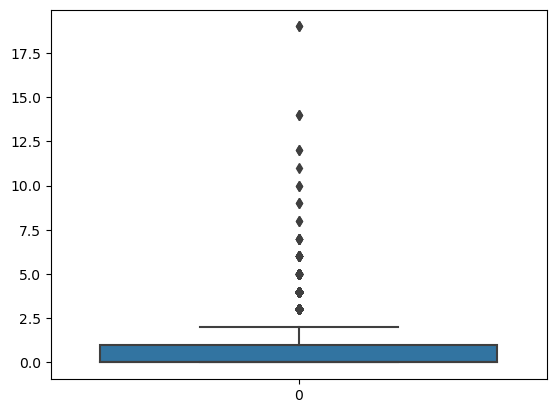

In [85]:
# Among the numerical columns we have to identify the outliers of the columns named 'CNT_CHILDREN','AMT_INCOME_TOTAL',
#'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','YEARS_BIRTH','YEARS_EMPLOYED', 'CNT_FAM_MEMBERS'
#Finding outliers of 'CNT_CHILDREN'
sns.boxplot(loan['CNT_CHILDREN'])
plt.show()

In [86]:
#There are outliers which is identified using:
loan[loan['CNT_CHILDREN'] == loan['CNT_CHILDREN'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,...,30.293151,5.076712,Waiters/barmen staff,20.0,Restaurant,100000-250000,250000-500000,10000-25000,100000-250000,"(25, 35]"
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,...,28.210959,2.454795,Core staff,20.0,Kindergarten,100000-250000,100000-250000,0-10000,100000-250000,"(25, 35]"


In [87]:
#There are two rows with 19 children which is unusual and thus they are outliers. Hence, dropping them.
loan=loan.drop([155369,265784])

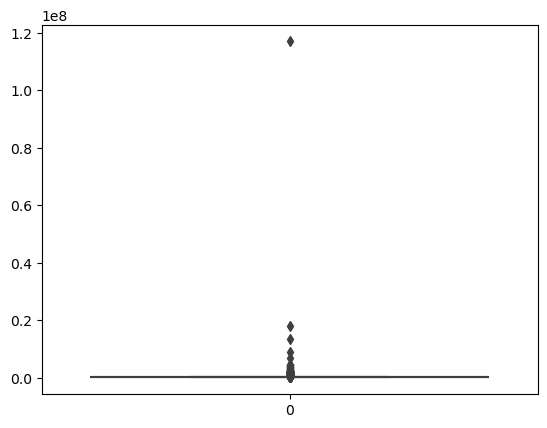

In [88]:
#Finding outliers of 'AMT_INCOME_TOTAL'
sns.boxplot(loan['AMT_INCOME_TOTAL'])
plt.show()

In [89]:
#There is one outlier which is identified using:
loan[loan['AMT_INCOME_TOTAL'] == loan['AMT_INCOME_TOTAL'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,...,34.561644,2.526027,Laborers,3.0,Business Entity Type 3,5000000 and above,500000-750000,25000-50000,250000-500000,"(25, 35]"


In [90]:
#We can see that the person whose income total is abnormally high is a female labourer with only two years experience which is 
#not quite right logically. So it is an outlier which has to be dropped
loan=loan.drop(12840)

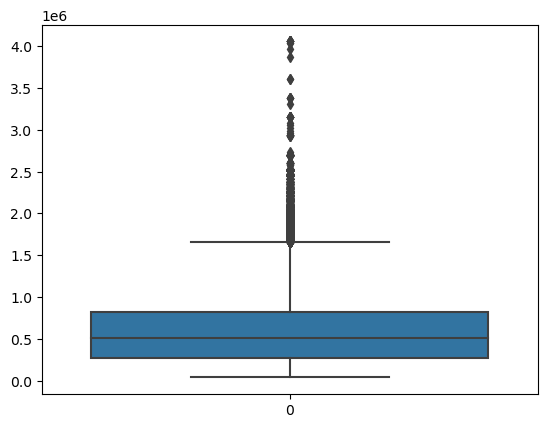

In [91]:
#Finding outliers of 'AMT_CREDIT'
sns.boxplot(loan['AMT_CREDIT'])
plt.show()

In [92]:
#The outliers are identified using:
loan[loan['AMT_CREDIT'] == loan['AMT_CREDIT'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
14852,117337,0,Cash loans,M,N,Y,1,760846.5,4050000.0,146002.5,...,35.057534,3.758904,Managers,3.0,Trade: type 7,750000-1000000,4000000 and above,125000-150000,4000000-4250000,"(35, 45]"
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,...,41.578082,0.550685,Managers,4.0,Industry: type 4,750000-1000000,4000000 and above,250000-275000,4000000-4250000,"(35, 45]"
110459,228135,0,Cash loans,M,N,N,2,864900.0,4050000.0,102384.0,...,40.931507,1.731507,Managers,4.0,Business Entity Type 3,750000-1000000,4000000 and above,100000-125000,4000000-4250000,"(35, 45]"
119681,238782,0,Cash loans,M,Y,Y,1,931365.0,4050000.0,102514.5,...,34.345205,1.865753,Managers,3.0,Transport: type 4,750000-1000000,4000000 and above,100000-125000,4000000-4250000,"(25, 35]"
120757,240007,0,Cash loans,M,N,N,0,587250.0,4050000.0,106969.5,...,54.501370,1.153425,Laborers,2.0,Industry: type 1,500000-750000,4000000 and above,100000-125000,4000000-4250000,"(45, 55]"
133766,255139,0,Cash loans,F,Y,N,1,1307587.5,4050000.0,100197.0,...,42.328767,0.687671,Managers,3.0,Trade: type 2,1250000-1500000,4000000 and above,100000-125000,4000000-4250000,"(35, 45]"
287732,433294,0,Cash loans,F,Y,N,1,405000.0,4050000.0,102514.5,...,31.109589,1.167123,Accountants,3.0,Business Entity Type 3,250000-500000,4000000 and above,100000-125000,4000000-4250000,"(25, 35]"
288455,434170,0,Cash loans,F,Y,N,1,450000.0,4050000.0,106839.0,...,45.504110,8.339726,Managers,3.0,Business Entity Type 3,250000-500000,4000000 and above,100000-125000,4000000-4250000,"(45, 55]"


In [93]:
#On closer look, the amount credit is more than the income, so these are outliers. Removing the outliers
loan.drop([14852,177948,110459,119681,120757,133766,287732,288455])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,25.920548,1.745205,Laborers,1.0,Business Entity Type 3,100000-250000,250000-500000,10000-25000,250000-500000,"(25, 35]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,45.931507,3.254795,Core staff,2.0,School,250000-500000,1250000-1500000,25000-50000,1000000-1250000,"(45, 55]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,52.180822,0.616438,Laborers,1.0,Government,0-100000,100000-250000,0-10000,100000-250000,"(45, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,52.068493,8.326027,Laborers,2.0,Business Entity Type 3,100000-250000,250000-500000,25000-50000,250000-500000,"(45, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,54.608219,8.323288,Core staff,1.0,Religion,100000-250000,500000-750000,10000-25000,500000-750000,"(45, 55]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,45.767123,19.884932,Sales staff,1.0,Self-employed,100000-250000,250000-500000,10000-25000,100000-250000,"(45, 55]"
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,25.553425,0.646575,Sales staff,1.0,Services,100000-250000,250000-500000,25000-50000,100000-250000,"(25, 35]"
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,41.002740,21.701370,Managers,1.0,School,100000-250000,500000-750000,25000-50000,500000-750000,"(35, 45]"
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,32.769863,13.112329,Laborers,2.0,Business Entity Type 1,100000-250000,250000-500000,10000-25000,250000-500000,"(25, 35]"


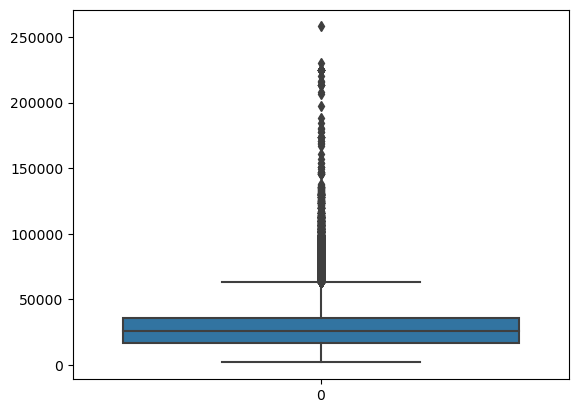

In [94]:
#Finding outliers of 'AMT_ANNUITY'
sns.boxplot(loan['AMT_ANNUITY'])
plt.show()

In [95]:
#There is an outlier but it is not unusual. So, not removing the outlier.

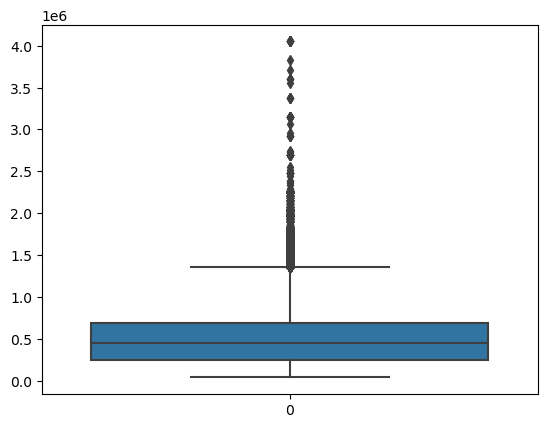

In [96]:
#Finding outliers of 'AMT_GOODS_PRICE'
sns.boxplot(loan['AMT_GOODS_PRICE'])
plt.show()

In [97]:
#Choosing to ignore the outliers here since they are not abnormally high

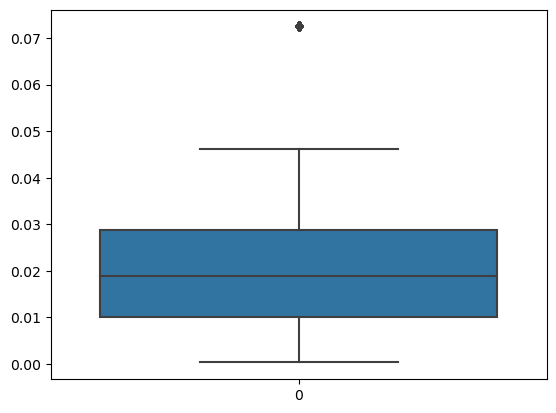

In [98]:
#Finding outliers of 'REGION_POPULATION_RELATIVE'
sns.boxplot(loan['REGION_POPULATION_RELATIVE'])
plt.show()

In [99]:
#There are outliers which is identified using:
loan[loan['REGION_POPULATION_RELATIVE'] == loan['REGION_POPULATION_RELATIVE'].max()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
65,100077,0,Cash loans,M,N,Y,0,180000.0,1256400.0,40657.5,...,33.010959,1.586301,Core staff,1.0,Police,100000-250000,1250000-1500000,25000-50000,750000-1000000,"(25, 35]"
86,100101,0,Cash loans,F,Y,Y,0,202500.0,343377.0,22072.5,...,49.693151,2.654795,High skill tech staff,1.0,Business Entity Type 1,100000-250000,250000-500000,10000-25000,250000-500000,"(45, 55]"
111,100131,0,Cash loans,F,N,Y,0,270000.0,891072.0,45625.5,...,37.890411,3.202740,Realty agents,1.0,Other,250000-500000,750000-1000000,25000-50000,500000-750000,"(35, 45]"
188,100218,0,Cash loans,M,Y,Y,0,337500.0,876078.0,49050.0,...,36.191781,0.616438,Drivers,1.0,Business Entity Type 3,250000-500000,750000-1000000,25000-50000,750000-1000000,"(35, 45]"
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,31.112329,1.649315,Laborers,2.0,Business Entity Type 3,100000-250000,1000000-1250000,25000-50000,750000-1000000,"(25, 35]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,...,54.742466,10.041096,Medicine staff,2.0,Medicine,100000-250000,2000000-2250000,50000-75000,1750000-2000000,"(45, 55]"
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,...,29.027397,9.961644,Accountants,2.0,Business Entity Type 3,250000-500000,1750000-2000000,50000-75000,1750000-2000000,"(25, 35]"
307440,456178,0,Cash loans,F,N,Y,0,440100.0,713889.0,45751.5,...,49.443836,5.167123,Managers,2.0,Business Entity Type 3,250000-500000,500000-750000,25000-50000,500000-750000,"(45, 55]"
307486,456230,0,Cash loans,F,Y,Y,1,292500.0,355536.0,18283.5,...,43.863014,3.246575,Laborers,3.0,Business Entity Type 2,250000-500000,250000-500000,10000-25000,250000-500000,"(35, 45]"


In [100]:
#Since the number of outliers are huge, choosing to ignore the outliers.

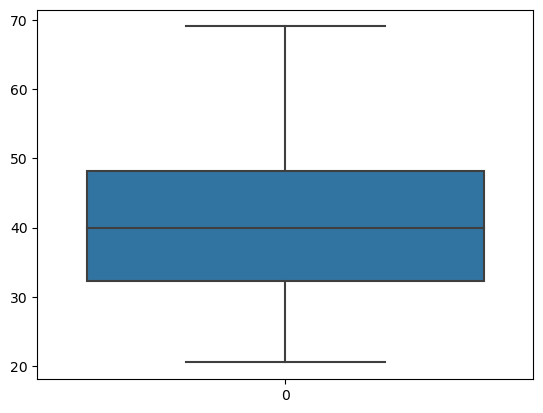

In [101]:
#Finding outliers of 'YEARS_BIRTH'
sns.boxplot(loan['YEARS_BIRTH'])
plt.show()

In [102]:
#No outliers here

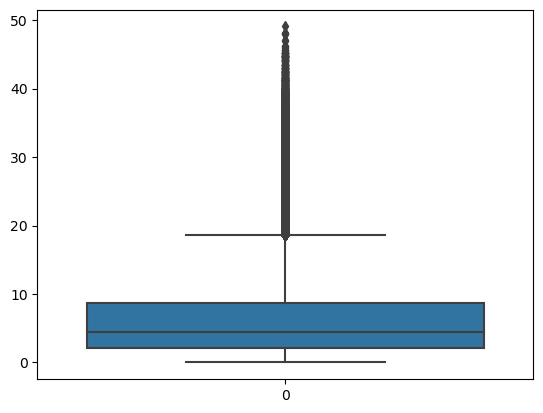

In [103]:
#Finding outliers of 'YEARS_EMPLOYED'
sns.boxplot(loan['YEARS_EMPLOYED'])
plt.show()

In [104]:
#There are outliers here but ignoring them since the number is more

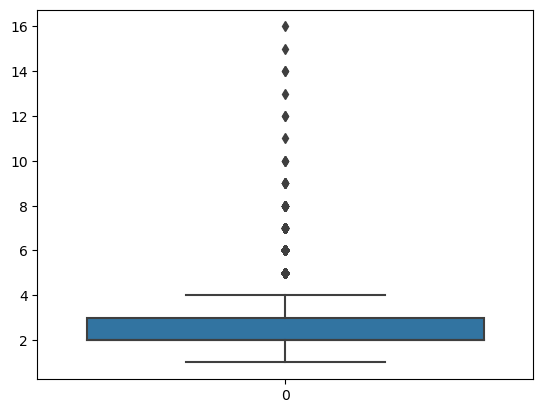

In [105]:
#Finding outliers of 'CNT_FAM_MEMBERS'
sns.boxplot(loan['CNT_FAM_MEMBERS'])
plt.show()

In [106]:
#There are no outliers here

### Data Imbalance

In [107]:
#The target variable values are either 0 or 1 for non-defaulters and defaulters respectively. Doing value counts here:
loan['TARGET'].value_counts()

TARGET
0    230300
1     21834
Name: count, dtype: int64

In [108]:
#Checking the imbalance percentage
print(loan.TARGET.value_counts()/ len(loan)*100)
# In the loan data, there exists 92% of "not default" and 8% of "default" customers
#OR the imbalance ratio is calculated by number of non-defaulters/number of non-defaulters
print("Ratio of Data Imbalance=",230300/21834)

TARGET
0    91.340319
1     8.659681
Name: count, dtype: float64
Ratio of Data Imbalance= 10.547769533754694


In [109]:
#The conclusion is that for every 10 non-defaulter, there is one defaulter.

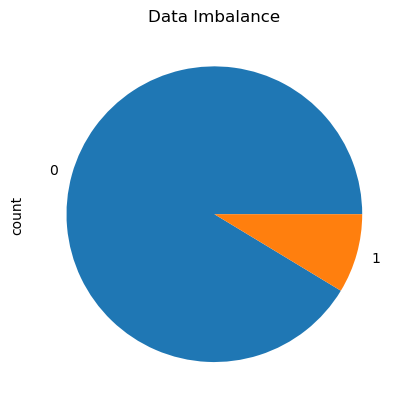

In [110]:
#Using a piechart to represent data imbalance
(loan.TARGET.value_counts()/ len(loan)).plot.pie()
plt.title('Data Imbalance')
plt.show()

In [111]:
#Thus, we can conclude that this is a highly imbalanced dataset

### Analysis of Data

In [112]:
#For the Analysis part, we will divide the application dataset into two different dataframes based on target variable's value.
#For defaulters,target value is 1 and for non-defaulers, the target value is 0
#Thus, the new dataframes will be loan_target0 and loan_target1 for non-defaulters and defaulters respectively.

In [113]:
# creating new datadrame for target 0
loan_target0 = loan[loan['TARGET']==0]
loan_target0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,45.931507,3.254795,Core staff,2.0,School,250000-500000,1250000-1500000,25000-50000,1000000-1250000,"(45, 55]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,52.180822,0.616438,Laborers,1.0,Government,0-100000,100000-250000,0-10000,100000-250000,"(45, 55]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,52.068493,8.326027,Laborers,2.0,Business Entity Type 3,100000-250000,250000-500000,25000-50000,250000-500000,"(45, 55]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,54.608219,8.323288,Core staff,1.0,Religion,100000-250000,500000-750000,10000-25000,500000-750000,"(45, 55]"
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,46.413699,4.350685,Laborers,2.0,Other,0-100000,250000-500000,25000-50000,250000-500000,"(45, 55]"


In [114]:
#Checking the shape of the dataframe
loan_target0.shape

(230300, 26)

In [115]:
# creating new datadrame for target 0
loan_target1 = loan[loan['TARGET']==1]
loan_target1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,YEARS_BIRTH,YEARS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_ANNUITY_RANGE,AMT_GOODS_PRICE_RANGE,AGE_GROUP
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,25.920548,1.745205,Laborers,1.0,Business Entity Type 3,100000-250000,250000-500000,10000-25000,250000-500000,"(25, 35]"
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,51.298630,7.200000,Cooking staff,1.0,Business Entity Type 3,100000-250000,750000-1000000,25000-50000,500000-750000,"(45, 55]"
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,47.895890,3.457534,Laborers,2.0,Business Entity Type 3,100000-250000,1000000-1250000,25000-50000,750000-1000000,"(45, 55]"
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,36.668493,9.854795,Sales staff,2.0,Self-employed,100000-250000,250000-500000,10000-25000,100000-250000,"(35, 45]"
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,27.942466,5.520548,Laborers,1.0,Industry: type 4,250000-500000,750000-1000000,50000-75000,750000-1000000,"(25, 35]"


In [116]:
#Checking the shape of the dataset
loan_target1.shape

(21834, 26)

## Univariate Analysis

### for numerical variables

In [117]:
#Here we are doing the segmented univariate analysis and for that we have created two dataframes in the above step with target 
#variales 0 and 1 (for non-defaulters and defaulters respectively). The analysis is based on this segmentaion.

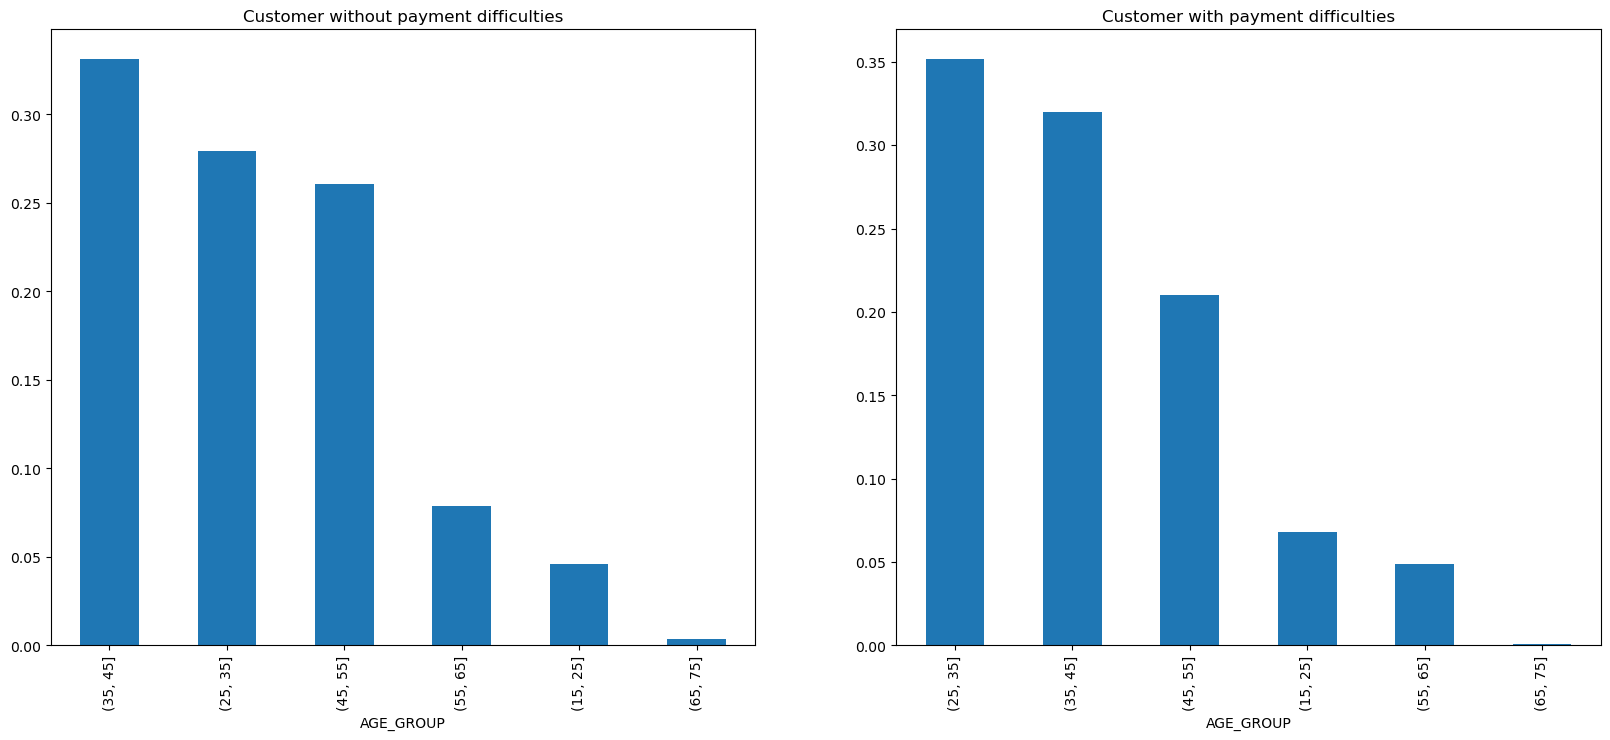

In [118]:
plt.figure(figsize=(20,8)) 

plt.subplot(1, 2, 1)
loan_target0.AGE_GROUP.value_counts(normalize= True).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1, 2, 2)
loan_target1.AGE_GROUP.value_counts(normalize= True).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [119]:
#Inference:
#From the above plot, we can conclude that customer without payment difficulties are aged between 35 to 55 years,and customer 
#with payment difficulties have age in between 25 to 45 years.

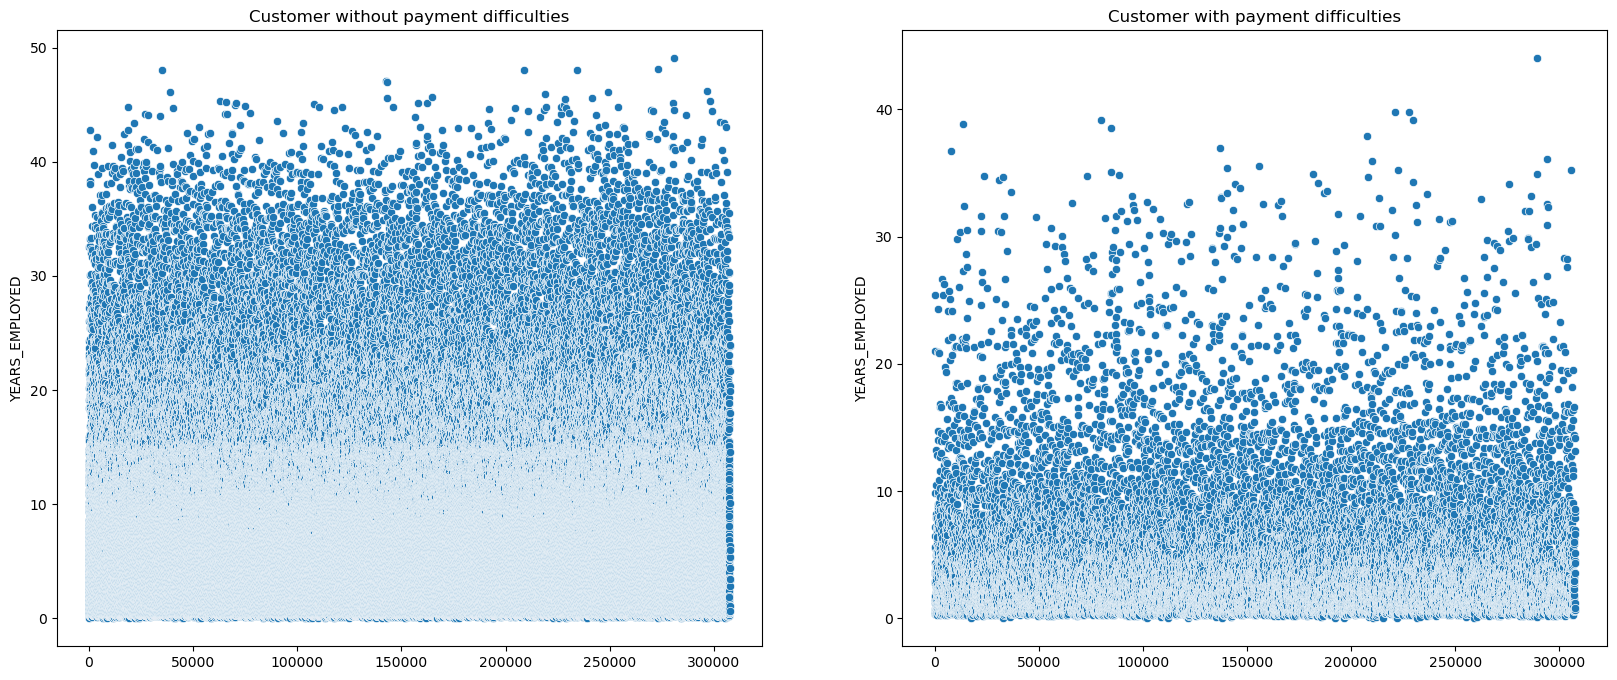

In [120]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.scatterplot(data=loan_target0['YEARS_EMPLOYED'])
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data=loan_target1['YEARS_EMPLOYED'])
plt.title('Customer with payment difficulties')
plt.show()

In [121]:
#Inference:
#From the above plot, we can conclude that customers with less than 10 years of experience are present maximum in both the cases

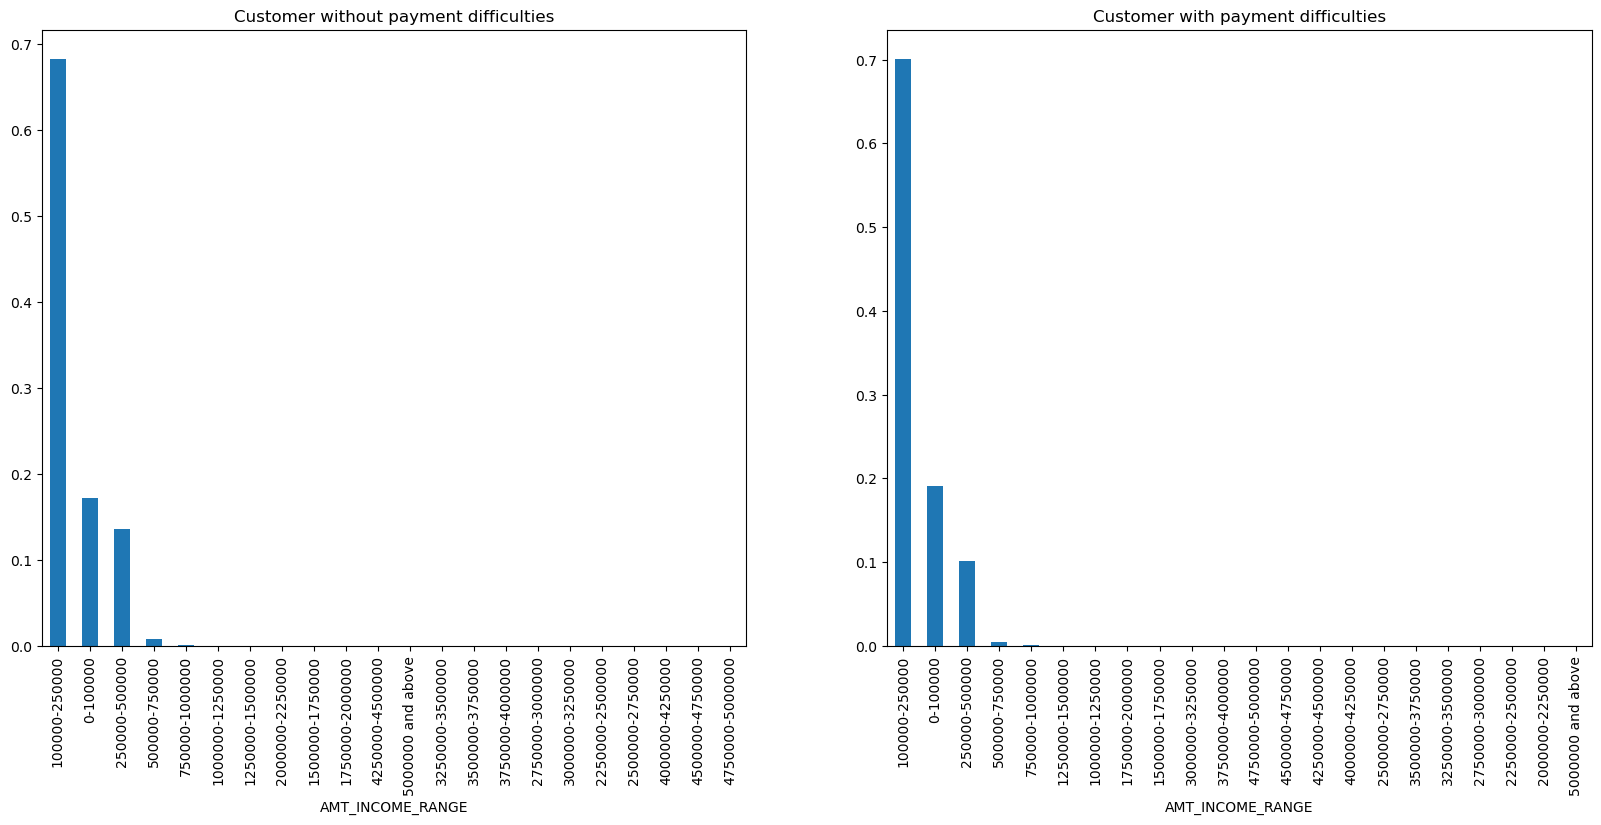

In [122]:
plt.figure(figsize=(20,8)) 
plt.subplot(1, 2, 1)
loan_target0.AMT_INCOME_RANGE.value_counts(normalize= True).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1, 2, 2)
loan_target1.AMT_INCOME_RANGE.value_counts(normalize= True).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [123]:
#Inference
#From the above plot, we can conclude that people with income range between 1 lakh ans 2.5 lakh are maximum in both the cases.

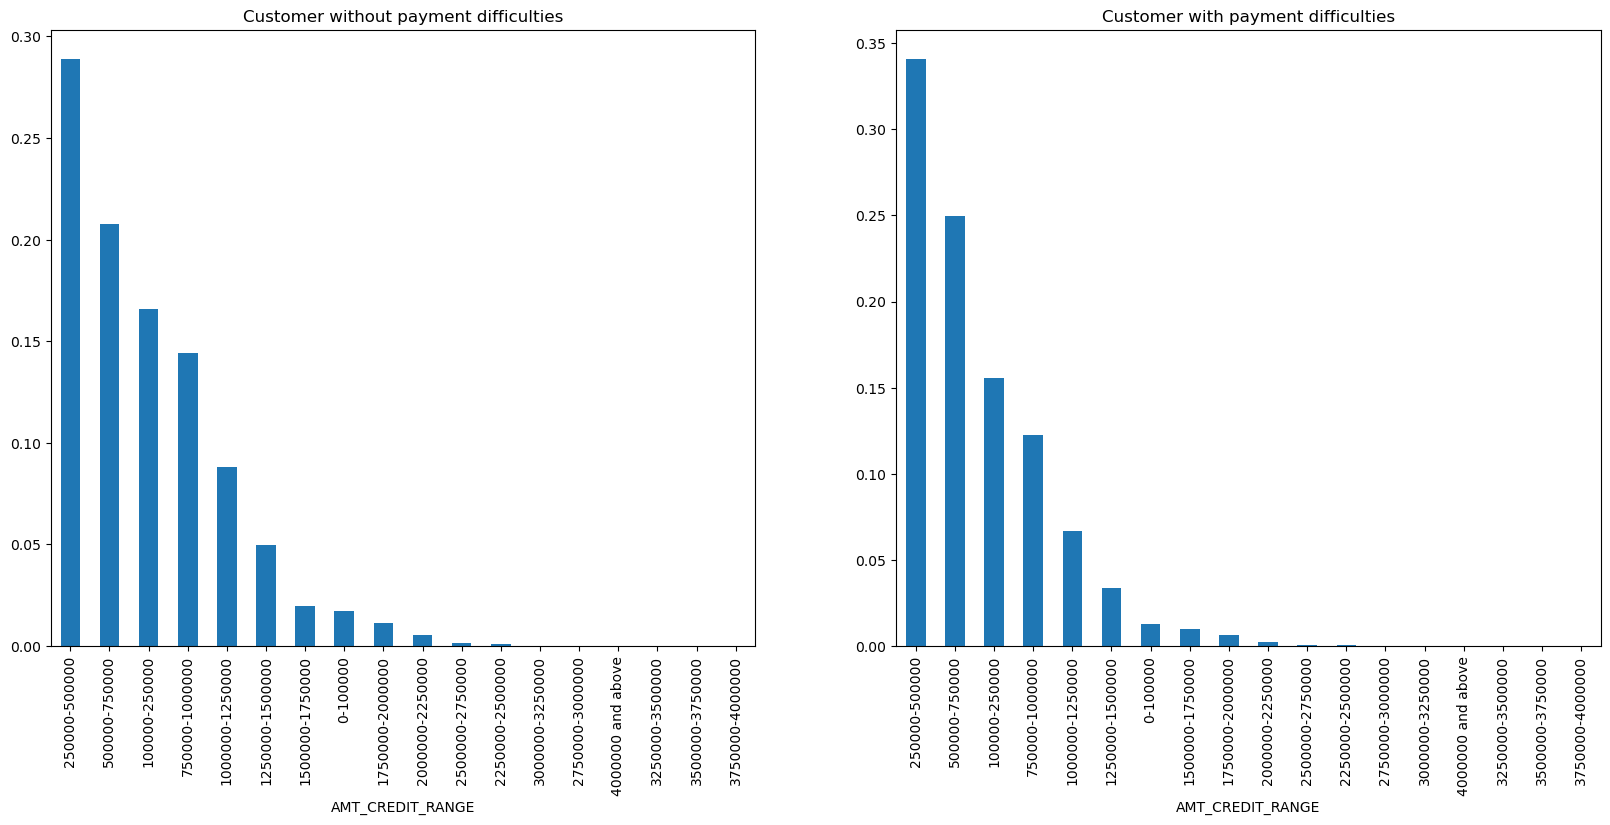

In [124]:
plt.figure(figsize=(20,8)) 
plt.subplot(1, 2, 1)
loan_target0.AMT_CREDIT_RANGE.value_counts(normalize= True).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1, 2, 2)
loan_target1.AMT_CREDIT_RANGE.value_counts(normalize= True).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [125]:
#Inference:
#From the above graph, we can conclude that clients with 2.5 lakh to 5 lakh credit range are maximum in both the cases.

### For Categorical Variables

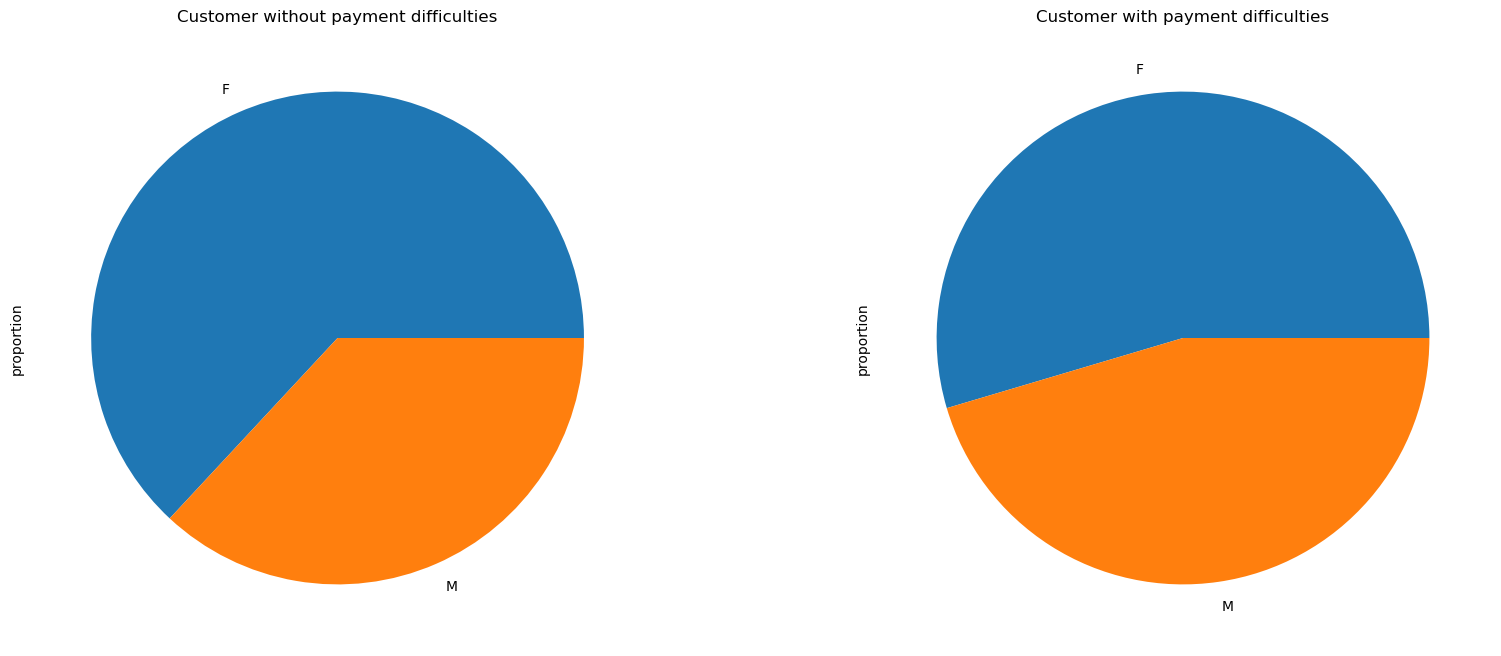

In [126]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['CODE_GENDER'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['CODE_GENDER'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer with payment difficulties')
plt.show()

In [127]:
#Inference:
#Female is more than Male in both the cases.

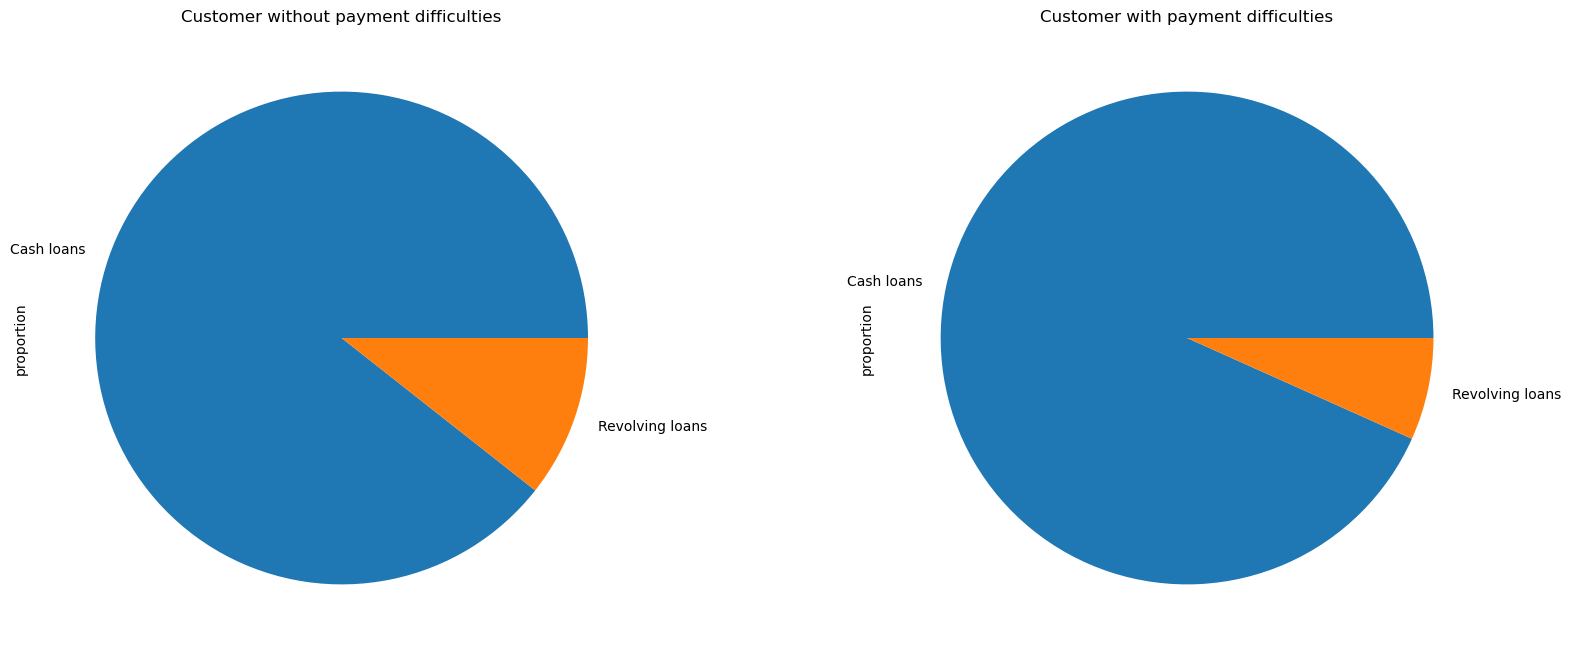

In [128]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['NAME_CONTRACT_TYPE'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer with payment difficulties')
plt.show()

In [129]:
#Inference:
#Clients prefer Cash loans to revolving loans between clients with payment difficuties and clients without payment difficulties

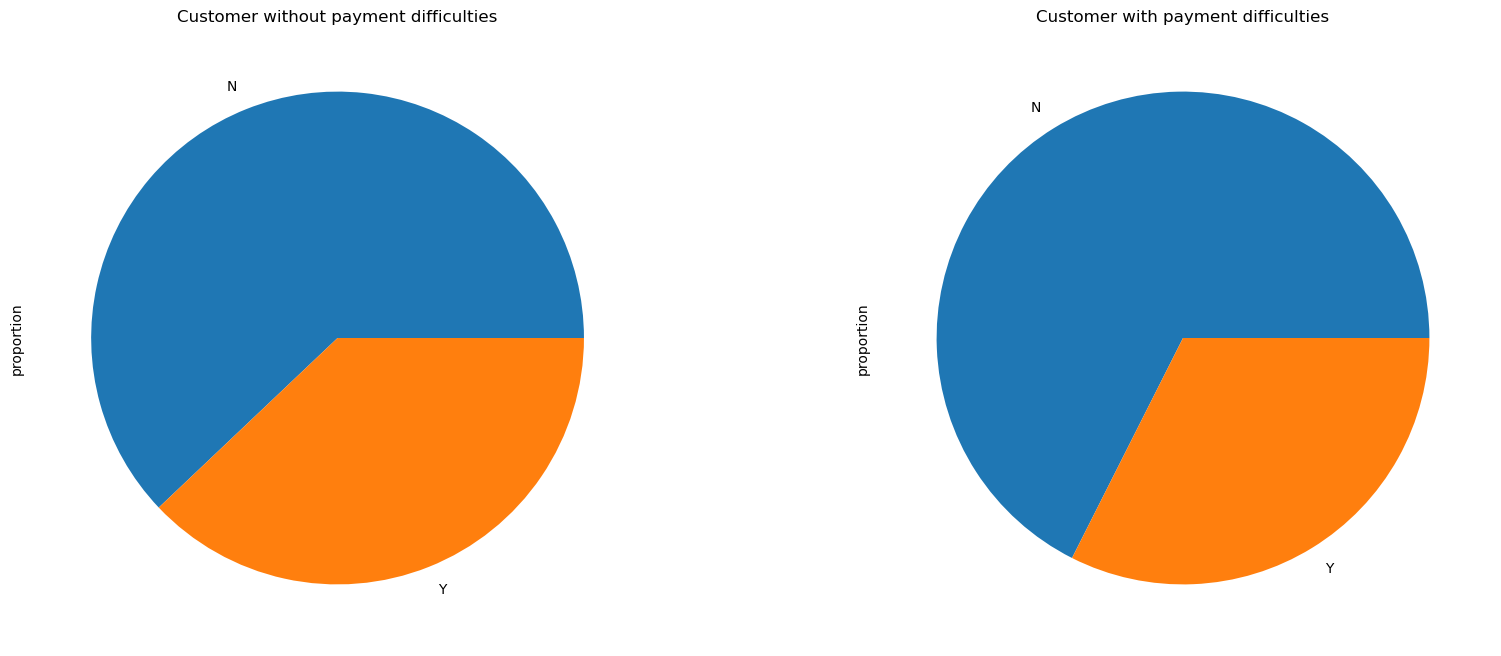

In [130]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['FLAG_OWN_CAR'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer with payment difficulties')
plt.show()

In [131]:
#Inference:
#Client's with own car is maximum in both the cases.

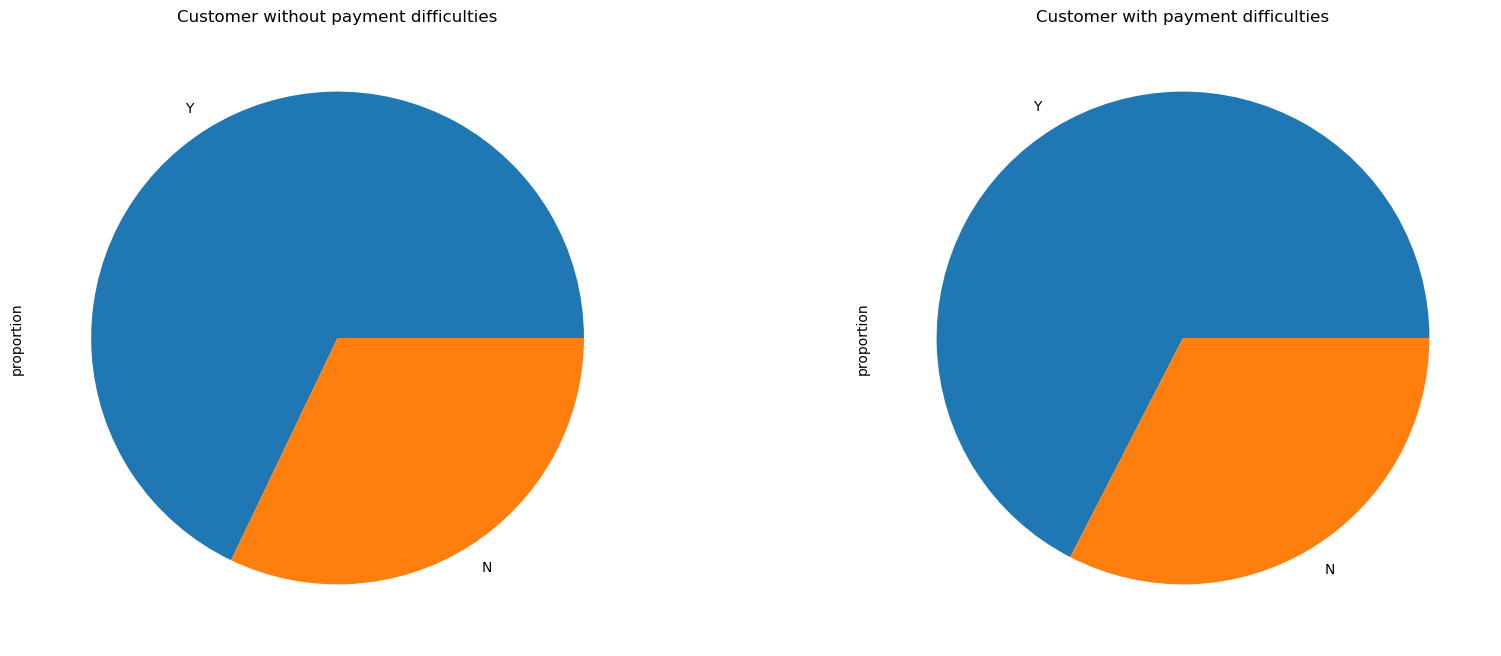

In [132]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['FLAG_OWN_REALTY'].value_counts(normalize=True, dropna=False).plot.pie()
plt.title('Customer with payment difficulties')
plt.show()

In [133]:
#Inference:
#Clients who owns some property are maximum in both the cases.

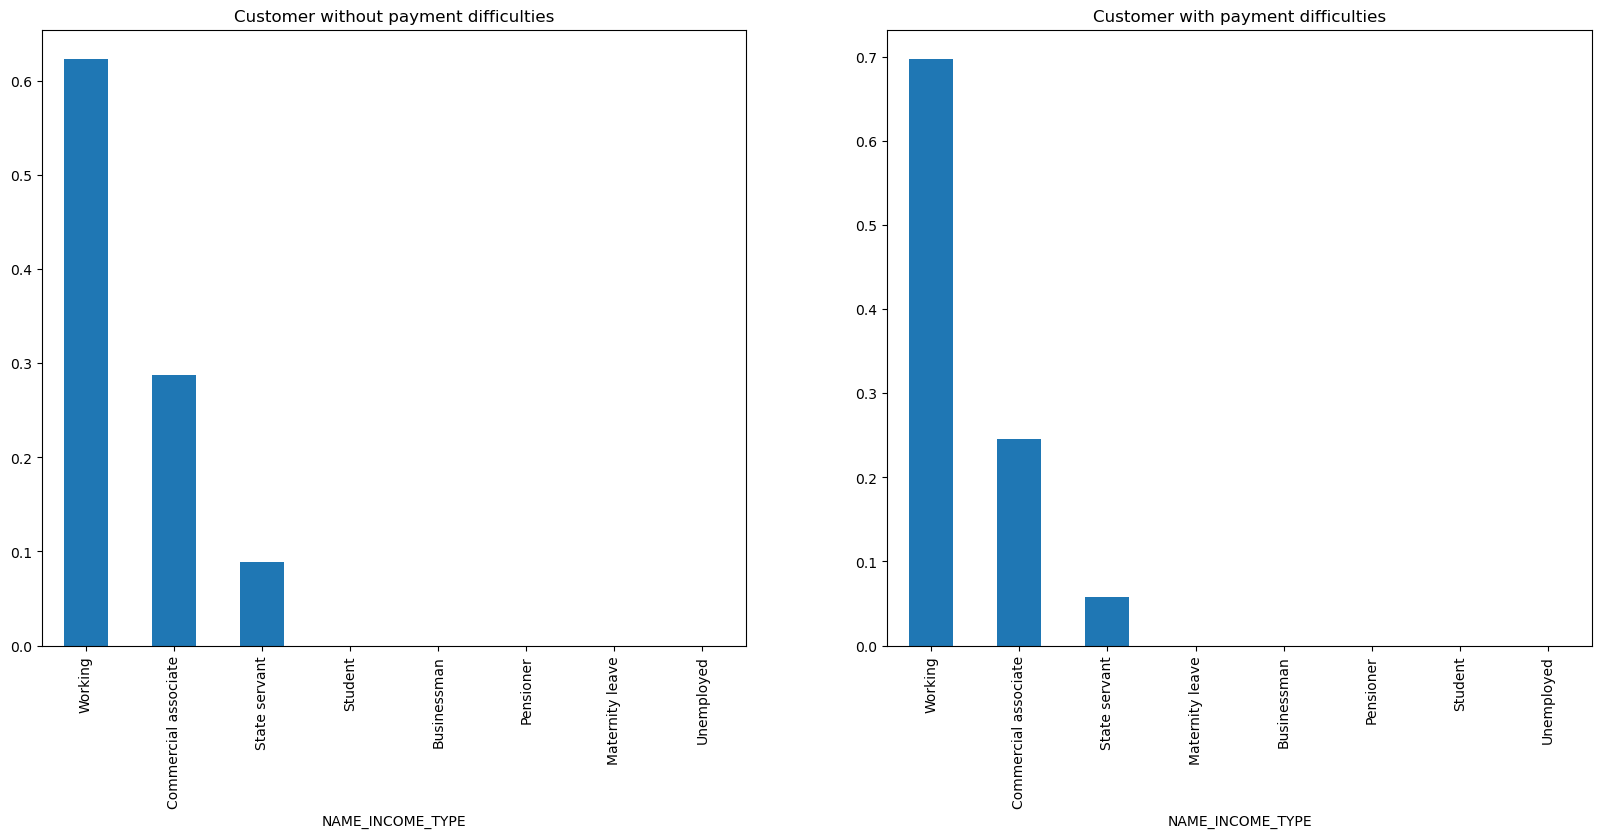

In [134]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['NAME_INCOME_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['NAME_INCOME_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [135]:
#Inference:
#Clients who are working and commercial associates are maximum in both the cases.

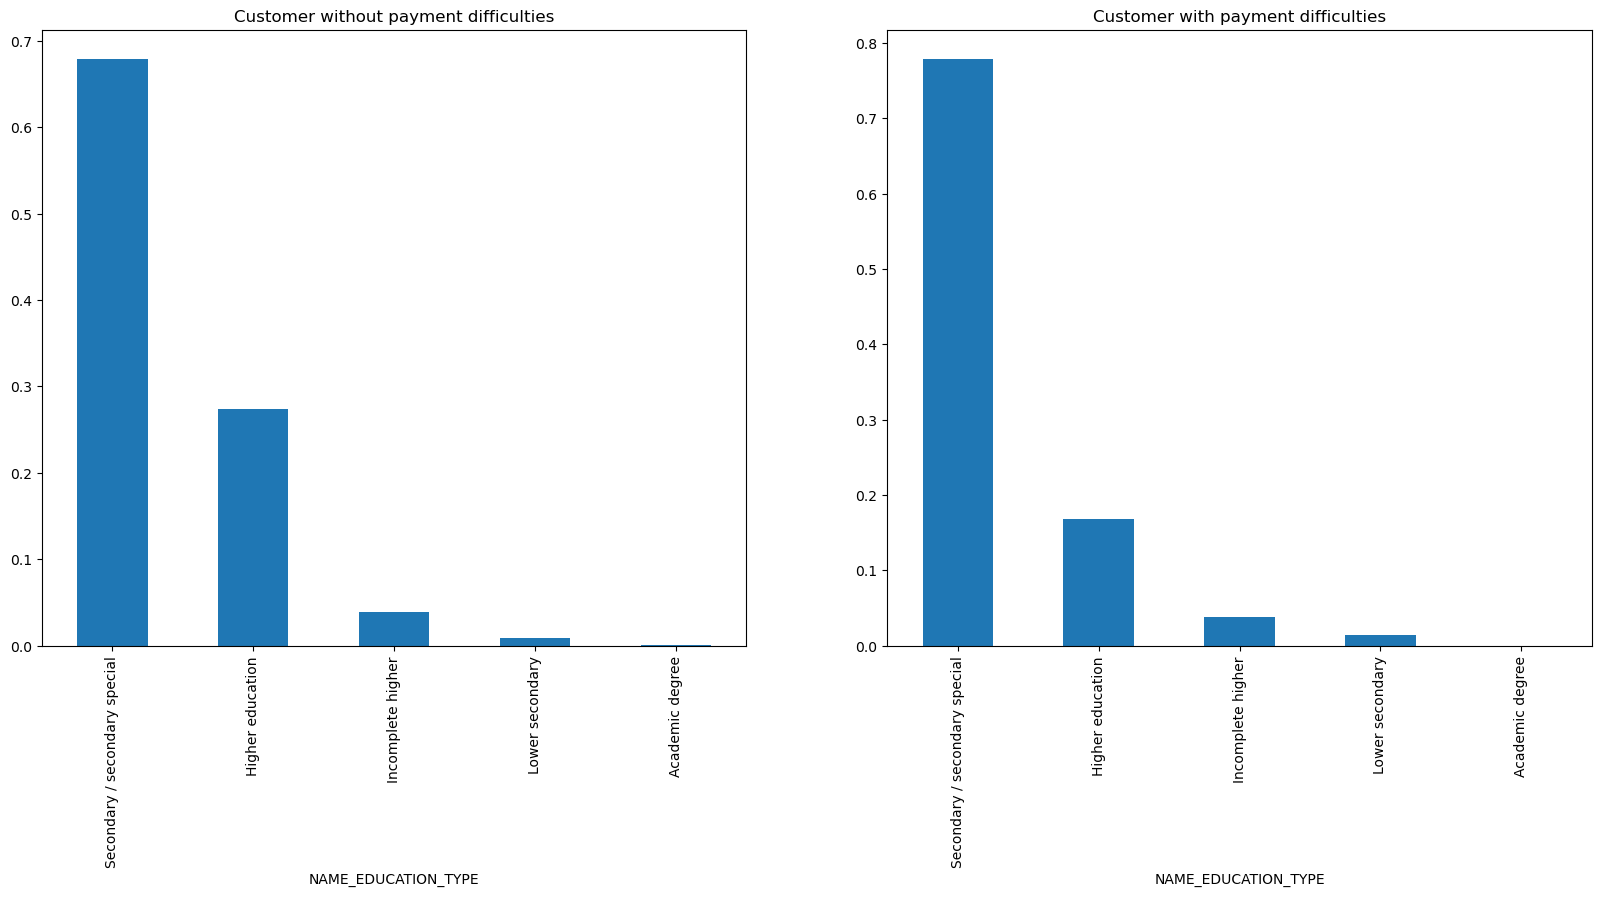

In [136]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['NAME_EDUCATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['NAME_EDUCATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [137]:
#Iference:
#Clients with secondary/secondary special education are maximum in both the cases.

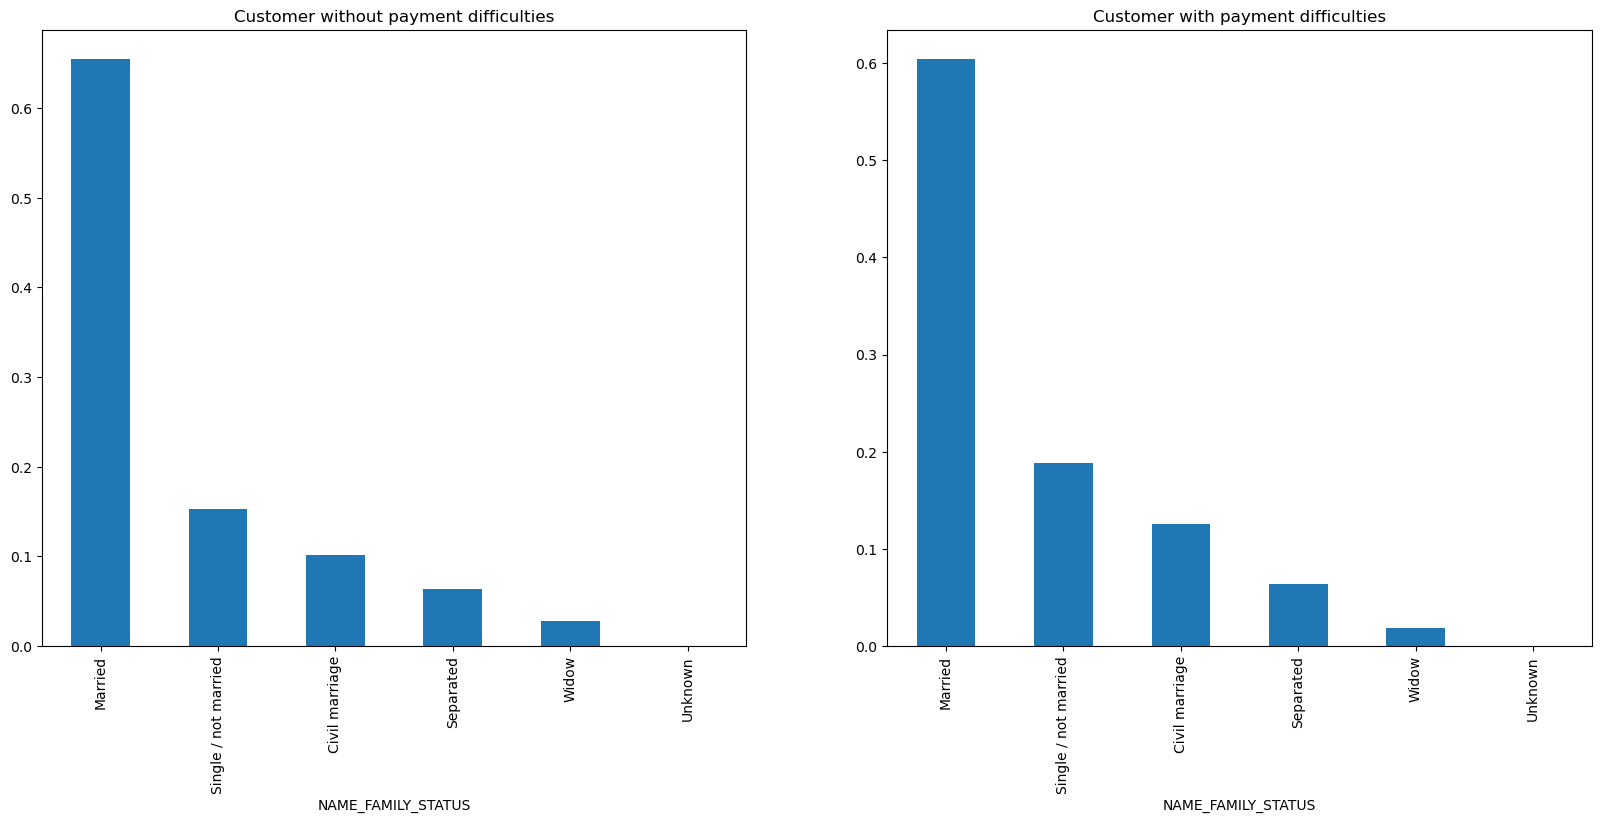

In [138]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['NAME_FAMILY_STATUS'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['NAME_FAMILY_STATUS'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [139]:
#Iference:
#Clients who are married are maximum in both the cases.

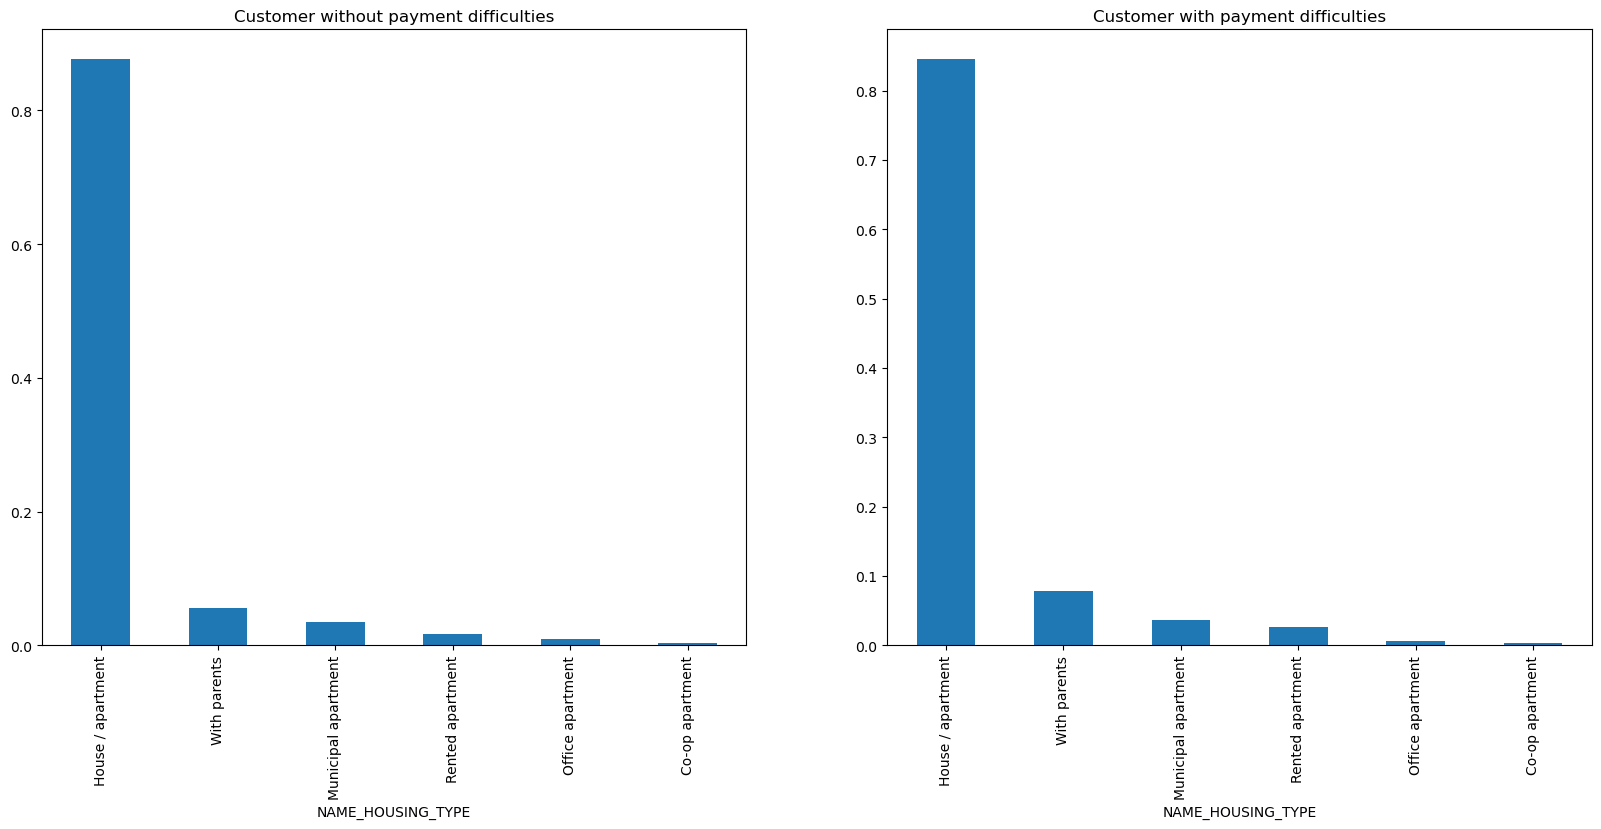

In [140]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['NAME_HOUSING_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['NAME_HOUSING_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [141]:
#Inference:
#Clients who stays in house/apartment are maximum in both the cases.

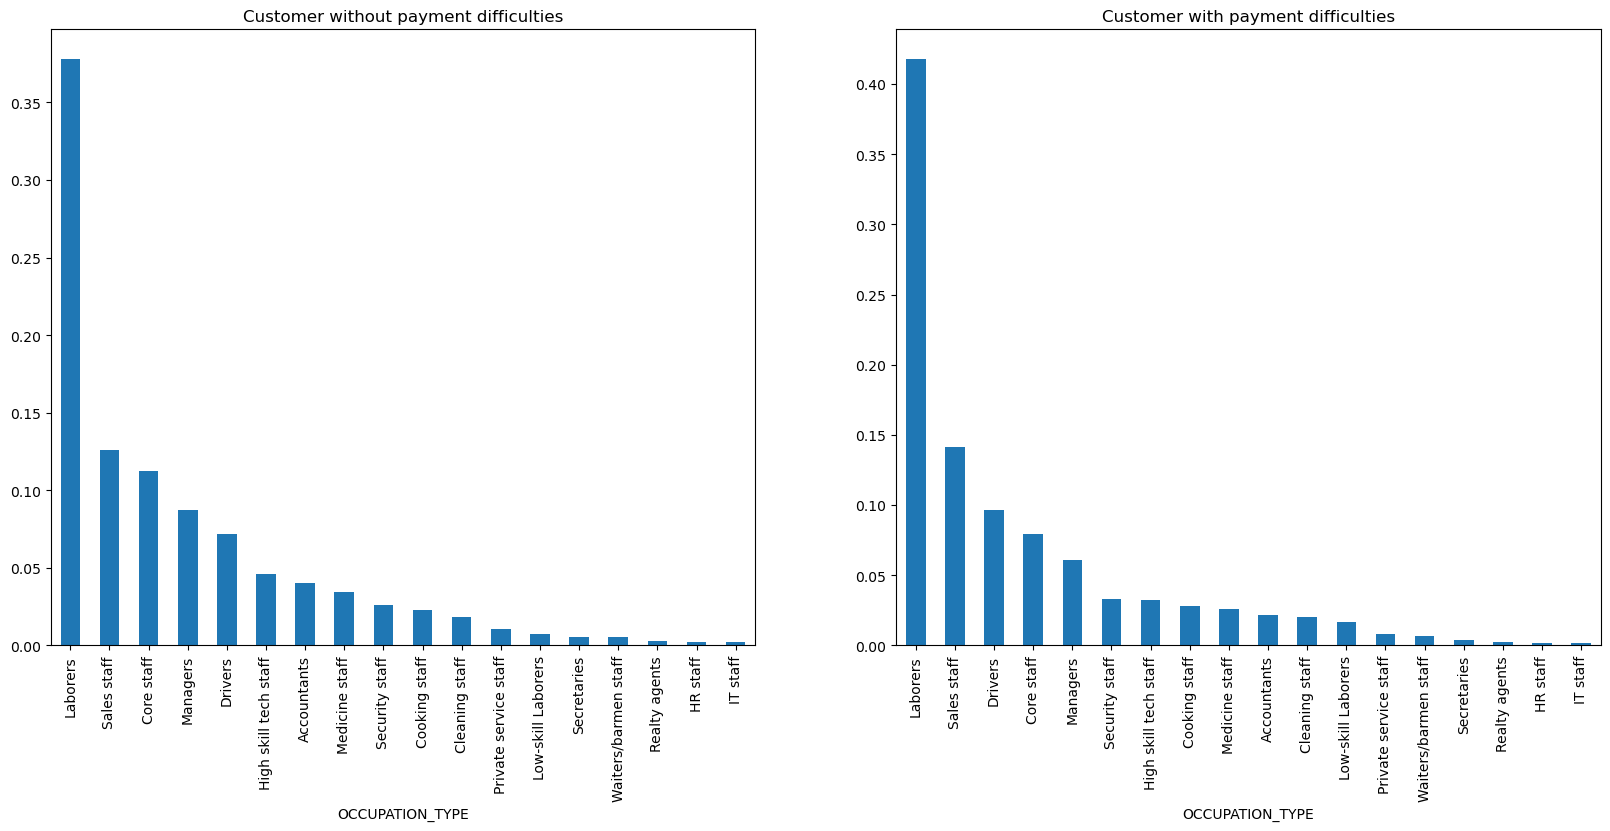

In [142]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['OCCUPATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['OCCUPATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [143]:
#Inference:
#Labourers and sales staff are maximum in both the cases.

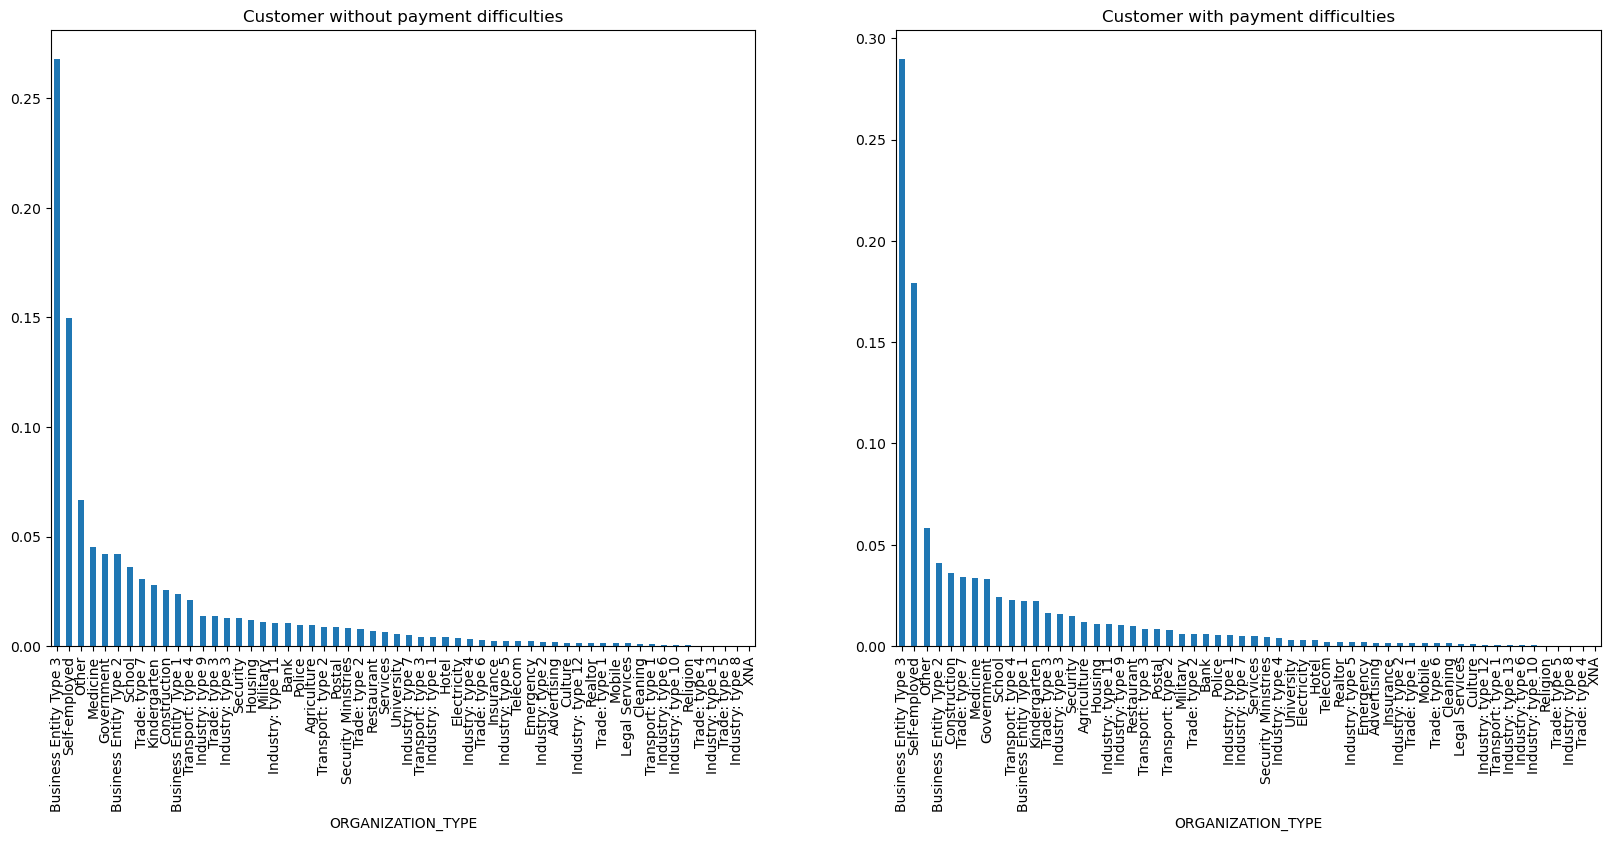

In [144]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
loan_target0['ORGANIZATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
loan_target1['ORGANIZATION_TYPE'].value_counts(normalize=True, dropna=False).plot.bar()
plt.title('Customer with payment difficulties')
plt.show()

In [145]:
#Inference:
#Clients who works for Business Entity Type 3 are maximum in both the cases.

In [146]:
#So, in conclusion, the univariate analysis was unable to give us some insights. So, moving on to bivariate analysis.

## Bivariate Analysis

### Numerical-Numerical bivariate analysis

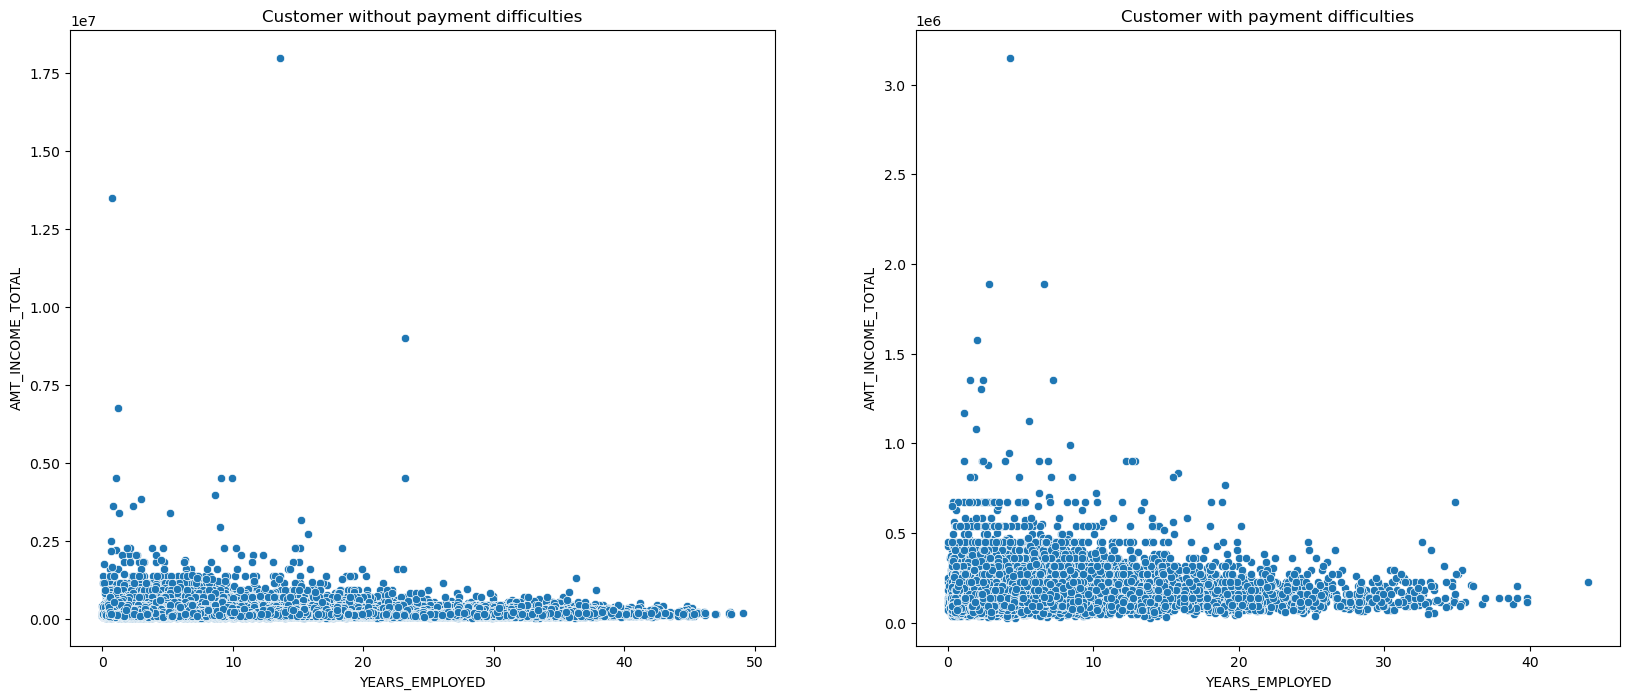

In [147]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
sns.scatterplot(data=loan_target0[loan_target0['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data=loan_target1[loan_target1['YEARS_EMPLOYED']<1000], x='YEARS_EMPLOYED',y='AMT_INCOME_TOTAL')
plt.title('Customer with payment difficulties')
plt.show()

In [148]:
#Inference:
#Among the client without payment difficulties, as the years and the income increase, there is a very low curve, i.e, the 
#number of clients decrease. In the case of clients with payment difficulties, it is a curve, showing that as the years and 
#income increase, the nuber of clients decrease and there are more clients clustered around the 0-20 years with low income.

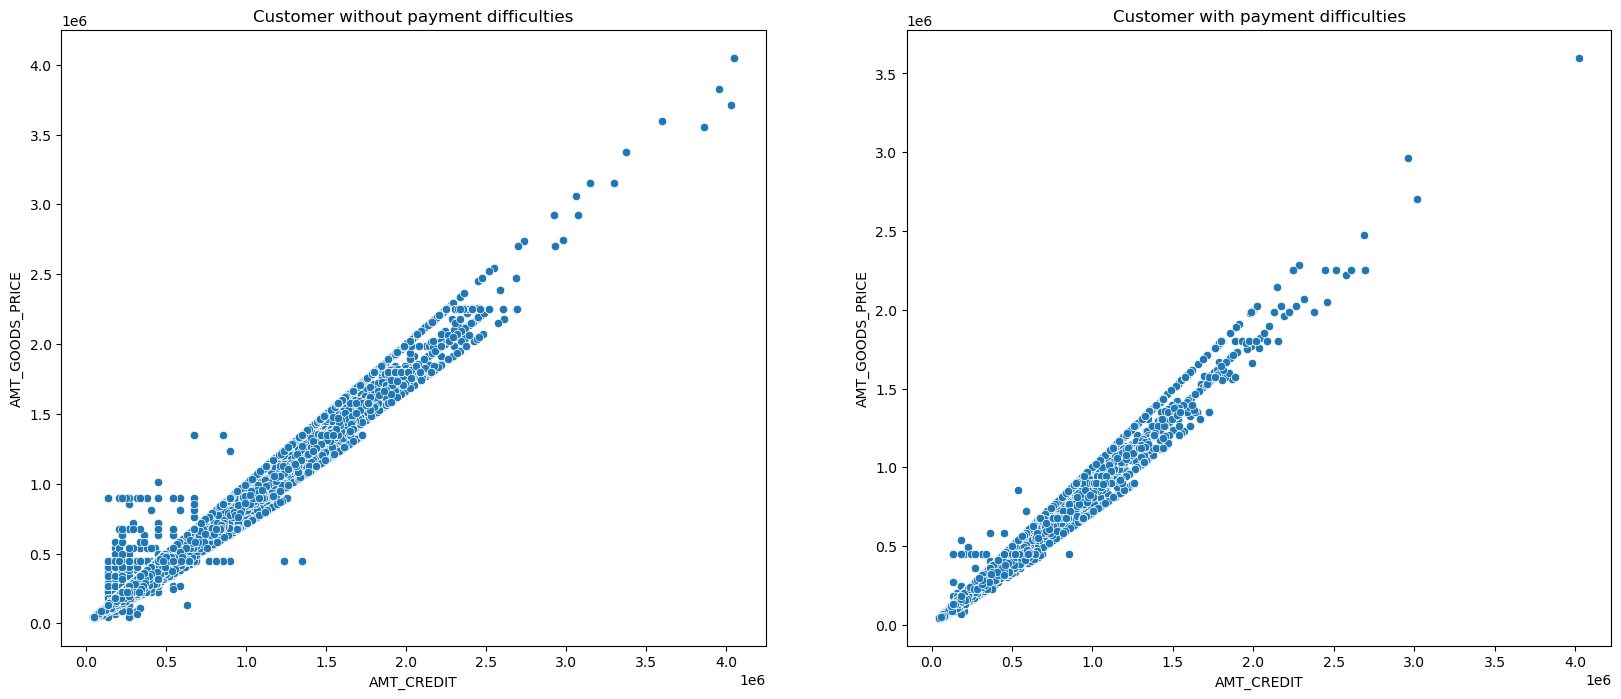

In [149]:
plt.figure(figsize=(20,8)) 
plt.subplot(1,2,1)
sns.scatterplot(data=loan_target0,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data=loan_target1,x='AMT_CREDIT',y='AMT_GOODS_PRICE')
plt.title('Customer with payment difficulties')
plt.show()

In [150]:
#Inference:
#From the above graph, we can see that goods price is positively correlated with credit amount in both the cases.

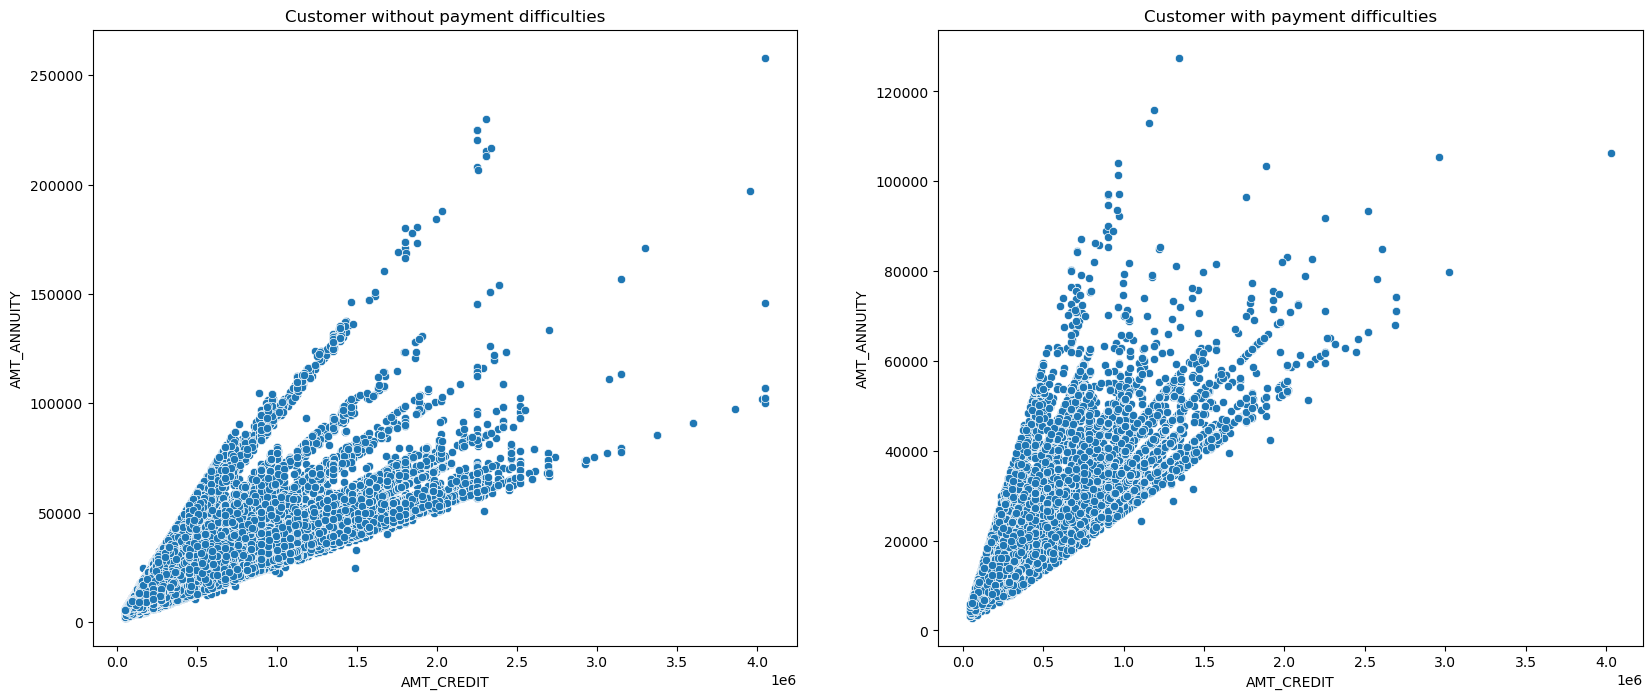

In [151]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.scatterplot(data=loan_target0,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer without payment difficulties')

plt.subplot(1,2,2)
sns.scatterplot(data=loan_target1,x='AMT_CREDIT',y='AMT_ANNUITY')
plt.title('Customer with payment difficulties')

plt.show()

In [152]:
#Inference:
#People without payment difficuties take more credit for the annuity that they have and people with payment difficulties take
#less credit for the annuity that they have.

### Categorical - categorical bivariate analysis

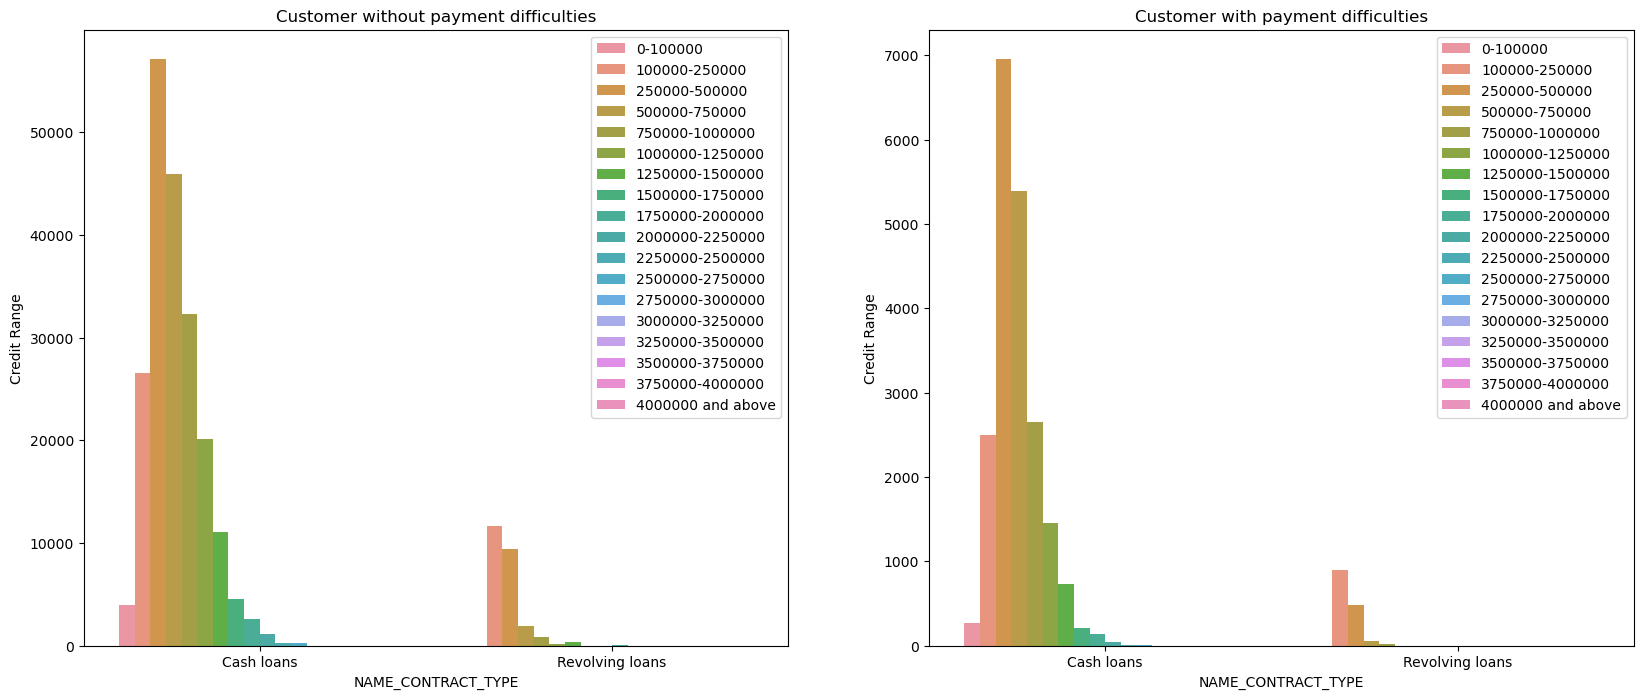

In [153]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.countplot(data=loan_target0,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer without payment difficulties')
plt.ylabel("Credit Range")
plt.legend(loc='upper right')


plt.subplot(1,2,2)
sns.countplot(data=loan_target1,x='NAME_CONTRACT_TYPE',hue='AMT_CREDIT_RANGE')
plt.title('Customer with payment difficulties')
plt.ylabel("Credit Range")
plt.legend(loc='upper right')
plt.show()

In [154]:
#Inference:
#Among clients with payment difficulties and clients without it,they prefer cash loans in the credit range of 2.5 lakh to 5 lakh
#and after that bucket, 5 lakh to 7.5 lakh credit amount bucket in cash loans has the second popularity.

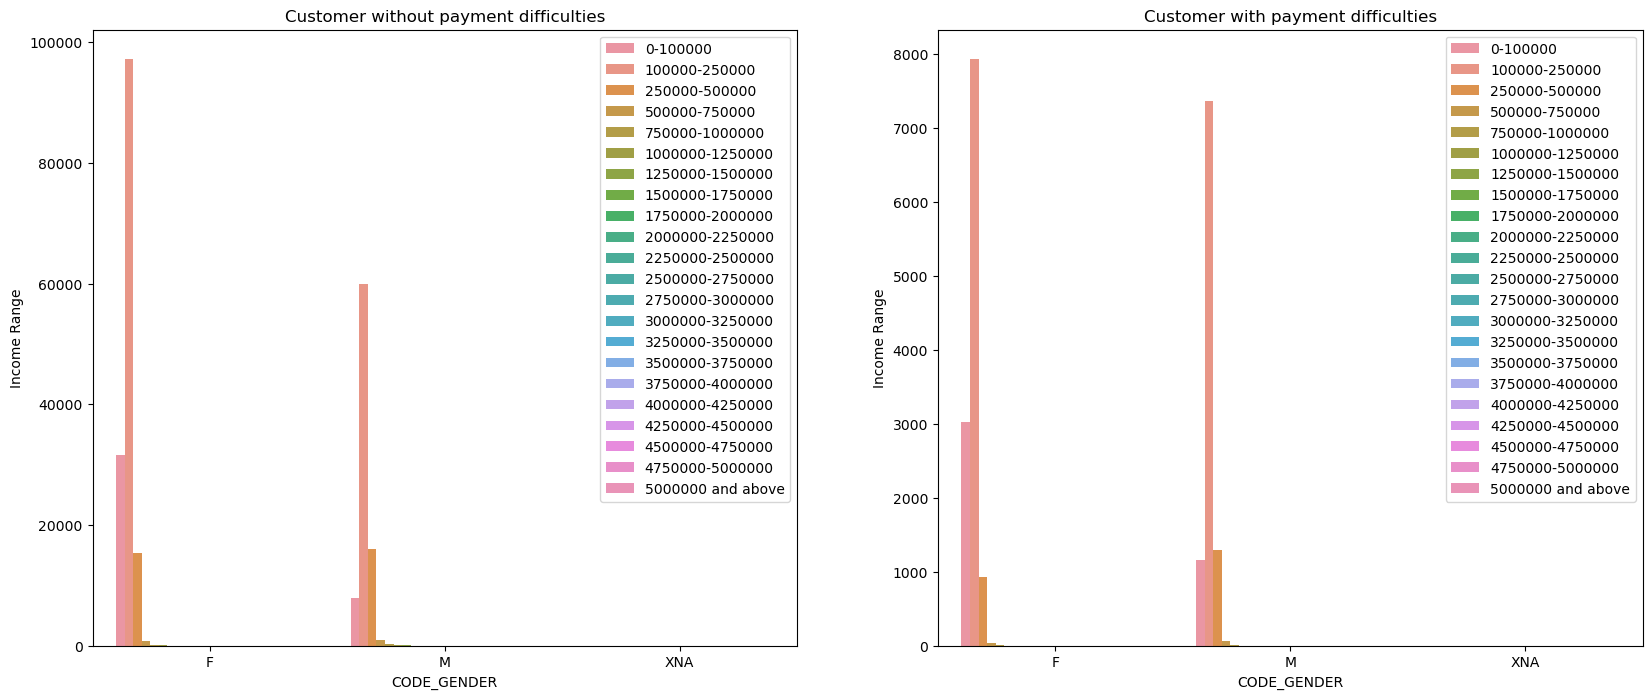

In [155]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.countplot(data=loan_target0,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Customer without payment difficulties')
plt.ylabel("Income Range")
plt.legend(loc='upper right')


plt.subplot(1,2,2)
sns.countplot(data=loan_target1,x='CODE_GENDER',hue='AMT_INCOME_RANGE')
plt.title('Customer with payment difficulties')
plt.ylabel("Income Range")
plt.legend(loc='upper right')
plt.show()

In [156]:
#Inference:
#Among clients with and without payment difficulties there are more female than male with income range of 1 lakh to 2.5 lakh

### Numerical- categorical bivariate analysis

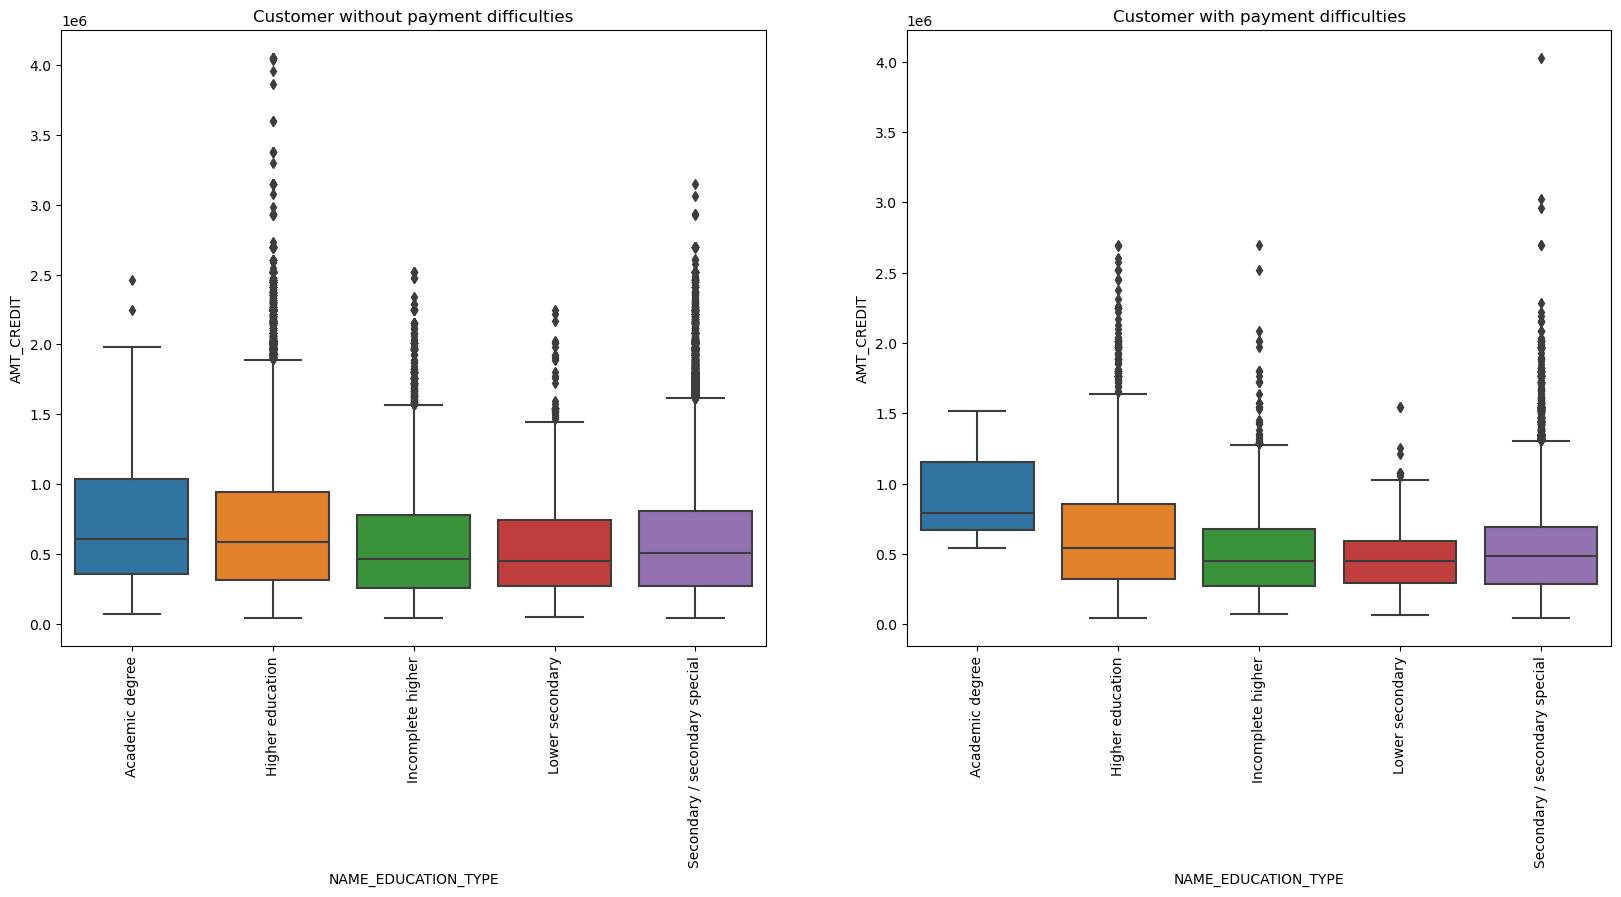

In [157]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.boxplot(data=loan_target0,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=loan_target1,y='AMT_CREDIT',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [158]:
#Inference:
#Here we can see that the range of customers without payment difficulties have more Academic degree than the customer with 
#payment difficulties. And the rest of the Education type is almost same for both the cases.

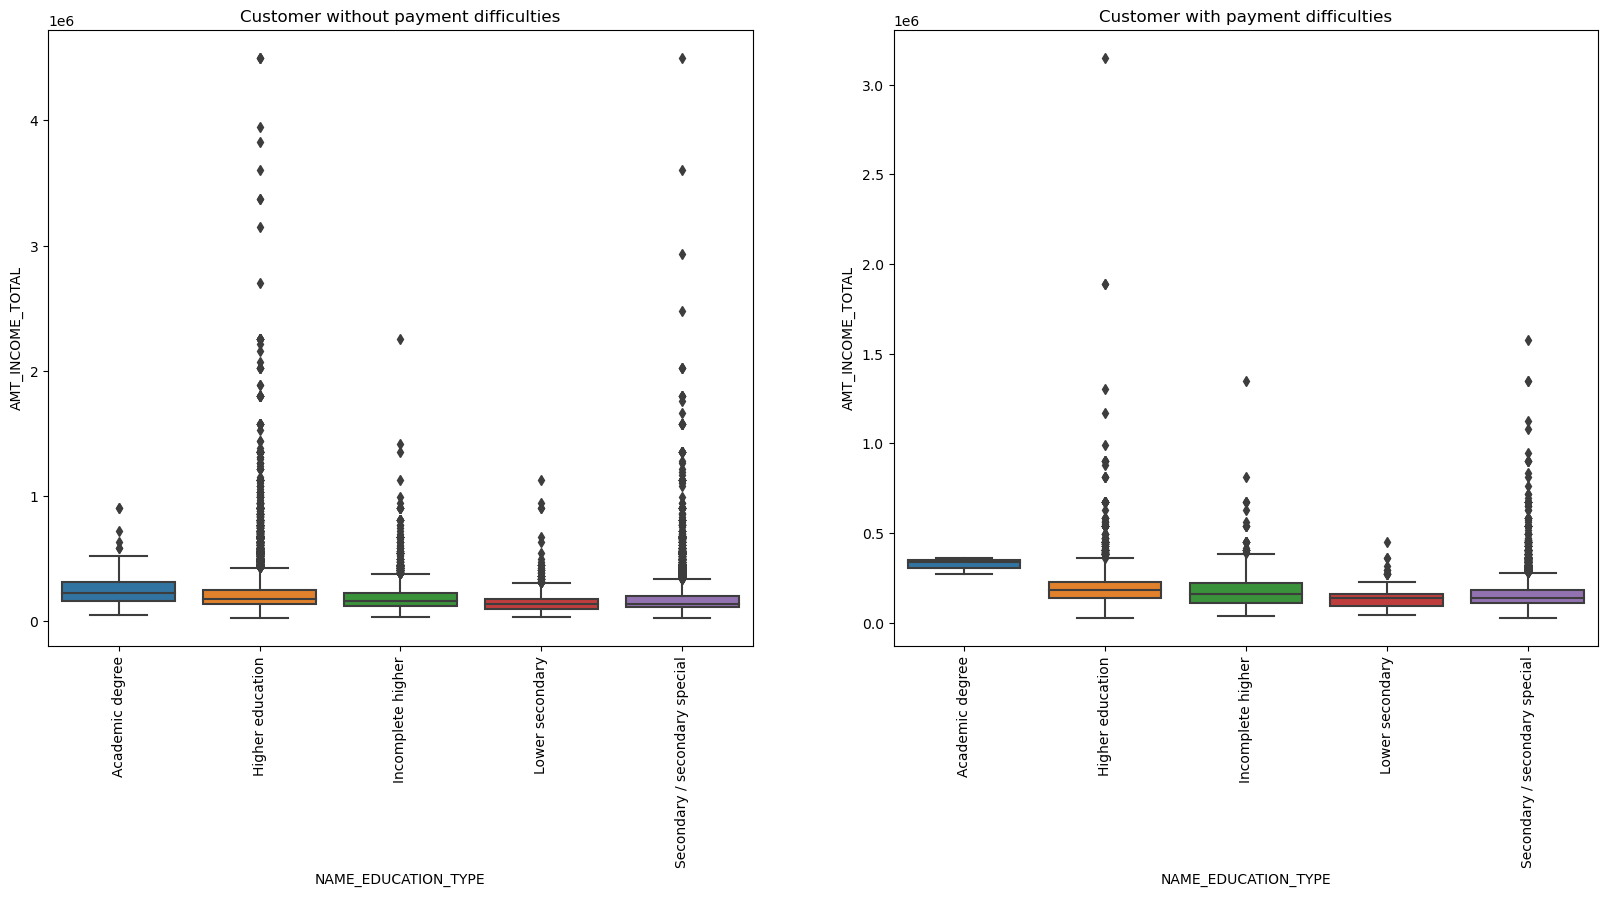

In [159]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.boxplot(data=loan_target0[loan_target0['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=loan_target1[loan_target1['AMT_INCOME_TOTAL']<5000000],y='AMT_INCOME_TOTAL',x='NAME_EDUCATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [160]:
#Inference:
#Here we can see that the customers without payment difficulties have academic degree and the income is also big

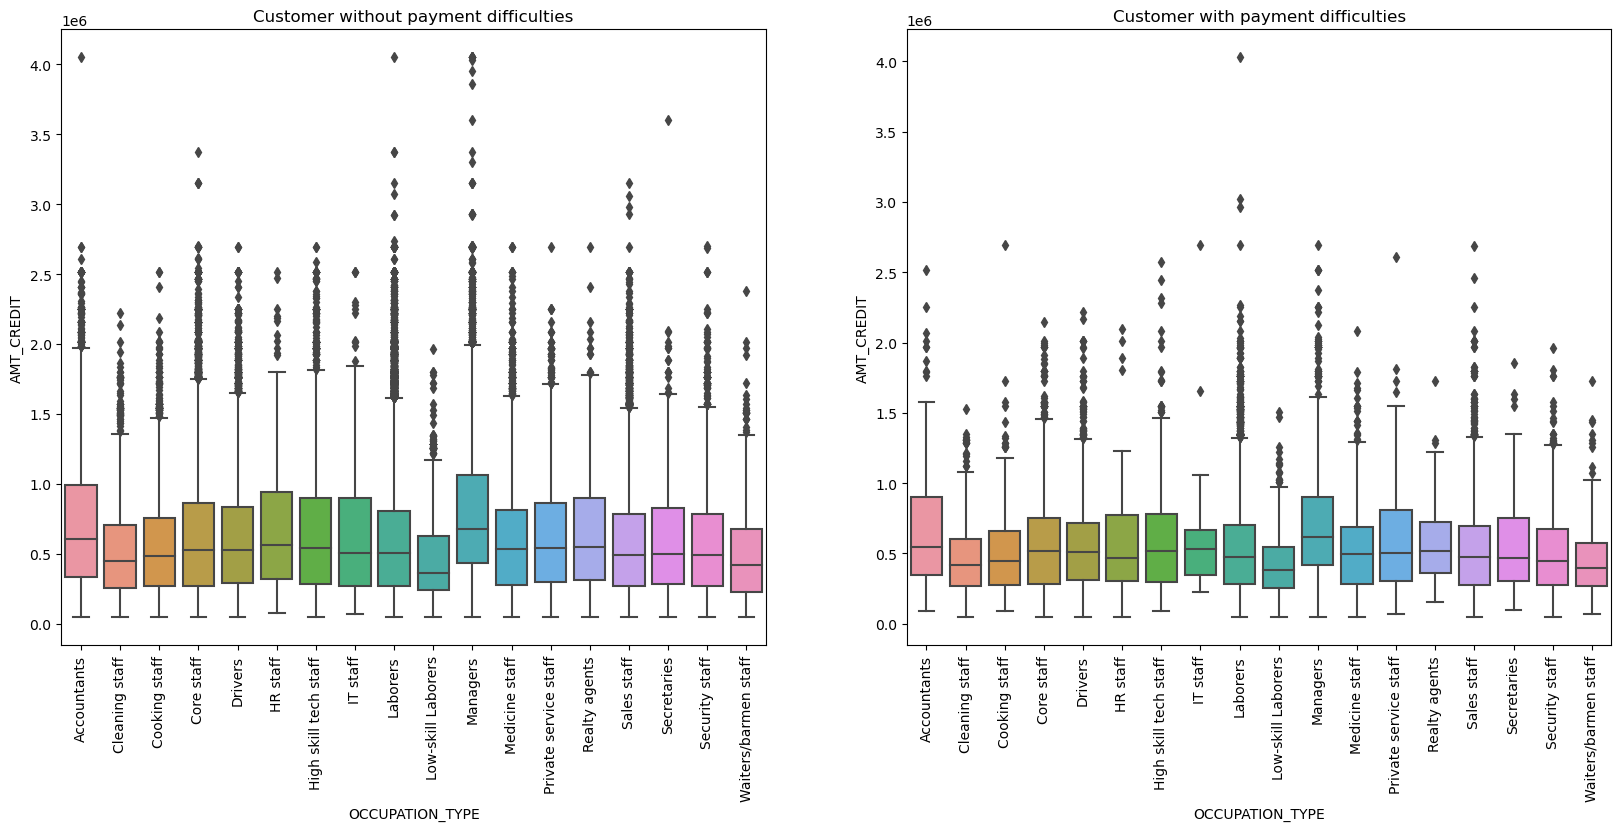

In [161]:
plt.figure(figsize=(20,8)) 

plt.subplot(1,2,1)
sns.boxplot(data=loan_target0,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer without payment difficulties')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.boxplot(data=loan_target1,y='AMT_CREDIT',x='OCCUPATION_TYPE')
plt.title('Customer with payment difficulties')
plt.xticks(rotation=90)
plt.show()

In [162]:
#Inference:
#Here we can see that the range of the customers without payment difficulties have less credit as compared to the customers 
#with payment difficulties among various occupation types.

### Studying 'previous' Dataset 

In [163]:
#Reading the dataset
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#Checking the shape of the dataset
previous.shape

(1670214, 37)

In [165]:
#Info of the dataset
previous.info

<bound method DataFrame.info of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1            

In [166]:
#description of the dataset
previous.describe

<bound method NDFrame.describe of          SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
1          

#### Merging the loa data and previous data together

In [167]:
#Merging the 'loan' data with 'previous' application data
df = pd.merge(left=loan, right=previous,how='inner', on='SK_ID_CURR')

In [168]:
#Checking the merged dataset
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [169]:
#Here, our area of interest is the contract status. Let's see what are the valuecounts int that column. Here, the percentages of
#each type of contract status is calculated
df['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.794282
Canceled        17.697023
Refused         17.680446
Unused offer     1.828249
Name: proportion, dtype: float64

In [170]:
#So, there are four types of contract statuses, they are either Approved, Canceled, Refused or Unused.

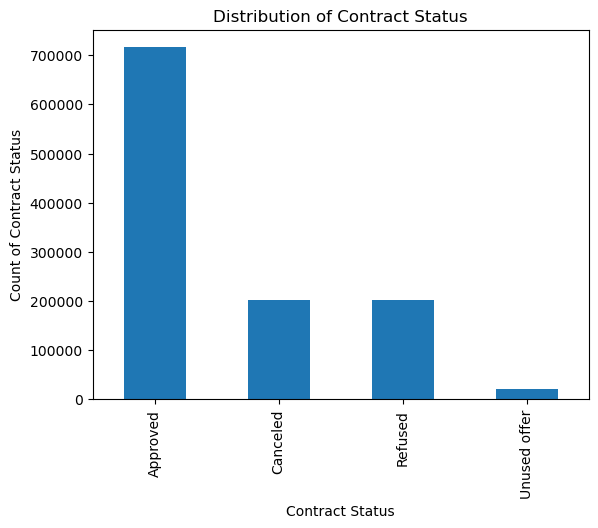

In [171]:
#Let's check the distribution of contract status among the clients
df['NAME_CONTRACT_STATUS'].value_counts().plot.bar()
plt.title('Distribution of Contract Status')
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.show()

In [172]:
# Dividing the new dataframe into 4 parts based on the contract status, i.e: Approved, refused, canceled, unused

In [173]:
approved_df = df[df['NAME_CONTRACT_STATUS']=='Approved']
refused_df = df[df['NAME_CONTRACT_STATUS']=='Refused']
cancelled_df = df[df['NAME_CONTRACT_STATUS']=='Canceled']
unused_df = df[df['NAME_CONTRACT_STATUS']=='Unused offer']

In [174]:
#Checking the contract type valuecounts again from the new dataset
df['NAME_CONTRACT_TYPE_x'].value_counts()

NAME_CONTRACT_TYPE_x
Cash loans         1048877
Revolving loans      91230
Name: count, dtype: int64

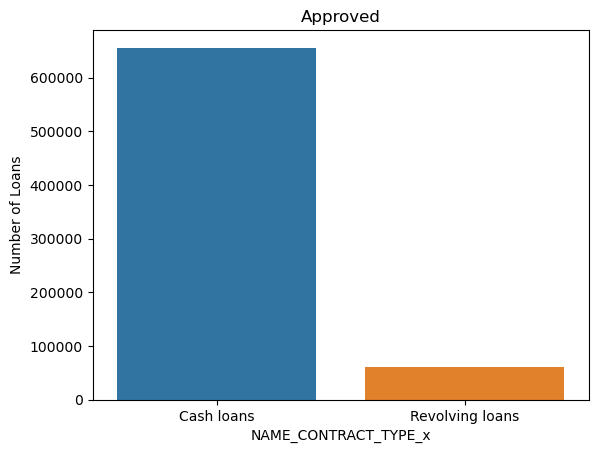

In [175]:
#Compare the number of Approved loans in each of the loan type
sns.countplot(data=approved_df,x='NAME_CONTRACT_TYPE_x')
plt.title("Approved")
plt.xlabel('NAME_CONTRACT_TYPE_x')
plt.ylabel("Number of Loans")
plt.show()

In [176]:
#Here, cash loans were approved more.

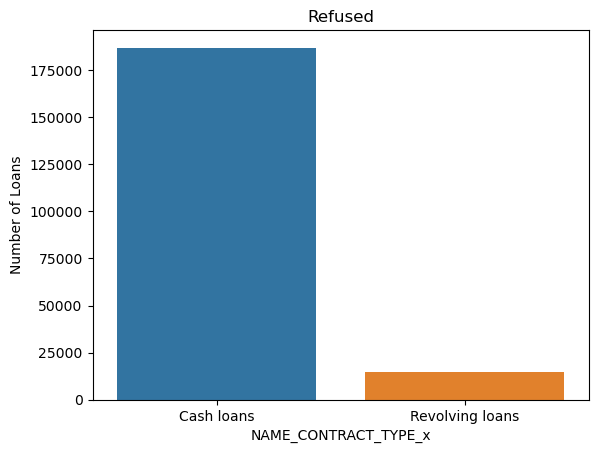

In [177]:
#Compare the number of Refused loans in each of the loan type
sns.countplot(data=refused_df,x='NAME_CONTRACT_TYPE_x')
plt.title("Refused")
plt.xlabel('NAME_CONTRACT_TYPE_x')
plt.ylabel("Number of Loans")
plt.show()

In [178]:
#Here, cash loans were refused more.

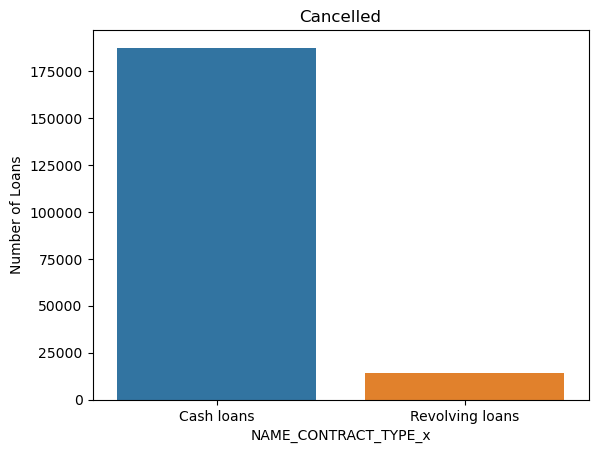

In [179]:
#Compare the number of Canceled loans in each of the loan type
sns.countplot(data=cancelled_df,x='NAME_CONTRACT_TYPE_x')
plt.title("Cancelled")
plt.xlabel('NAME_CONTRACT_TYPE_x')
plt.ylabel("Number of Loans")
plt.show()

In [180]:
#Here, cash loans were cancelled more.

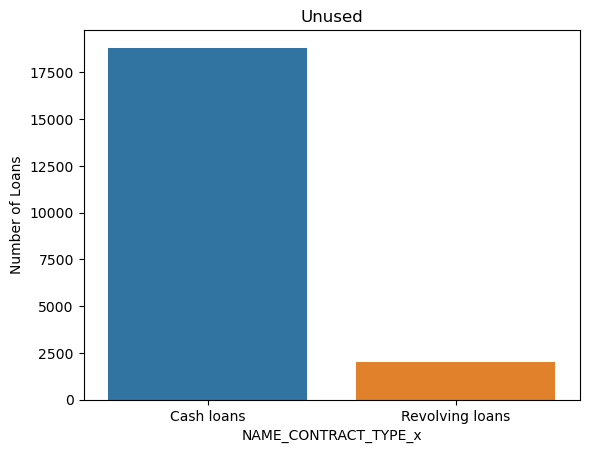

In [181]:
#Compare the number of Unused loans in each of the loan type
sns.countplot(data=unused_df,x='NAME_CONTRACT_TYPE_x')
plt.title("Unused")
plt.xlabel('NAME_CONTRACT_TYPE_x')
plt.ylabel("Number of Loans")
plt.show()

In [182]:
#Here, cash loans were unused more.

In [183]:
#Inference:
# Here we can see that the Revolving loan is much more acceptable as compare to the cash loans.

## Mutivariate Analysis

<Figure size 2000x1600 with 0 Axes>

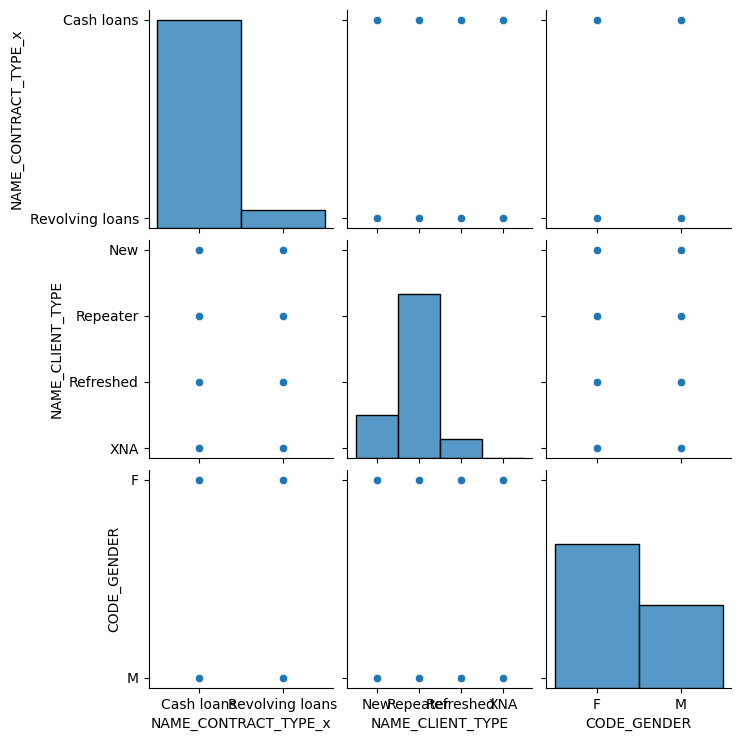

In [184]:
#Comparison between Contract type, Client Type and Gender
plt.figure(figsize=(20,16))
sns.pairplot(data=df, vars=["NAME_CONTRACT_TYPE_x","NAME_CLIENT_TYPE","CODE_GENDER"])
plt.xticks(rotation=90)
plt.show()

In [185]:
#Inference:
#The Repeater is getting more Refused but also we can see that the it also getting more apporved and even that it is getting more canceled and more usused.
#Here we can see that Female is getting more Refused more approved more canceled more unused but in case of male it is having average in every category.

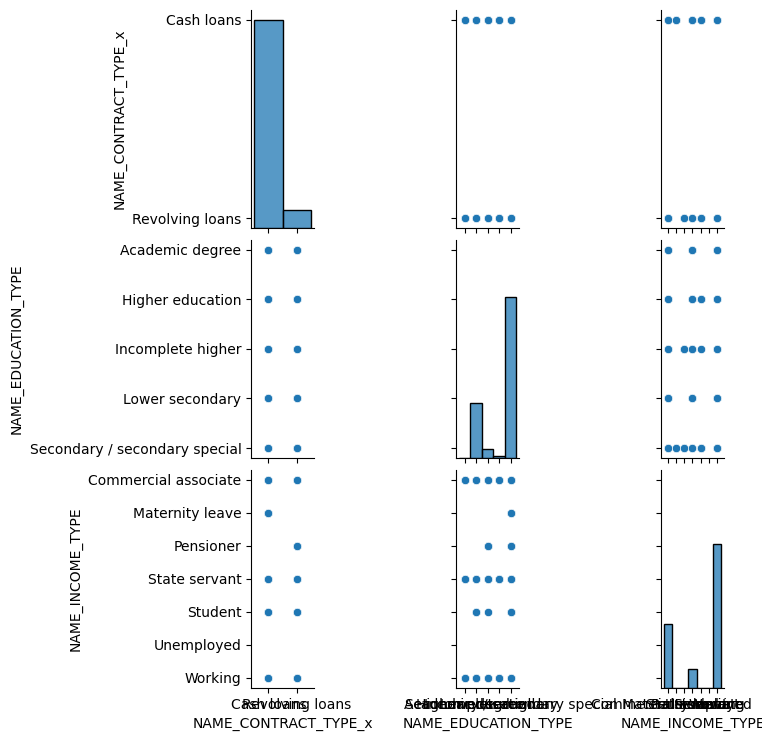

<Figure size 2000x1600 with 0 Axes>

In [186]:
sns.pairplot(data=df, vars=["NAME_CONTRACT_TYPE_x","NAME_EDUCATION_TYPE","NAME_INCOME_TYPE"])
plt.figure(figsize=(20,16))
plt.show()

In [187]:
#Inference:
#Secondary/ Secondary special is more effective in every case
#The working type people and commercial associates are applying more loans as compared to others.

<Figure size 1000x600 with 0 Axes>

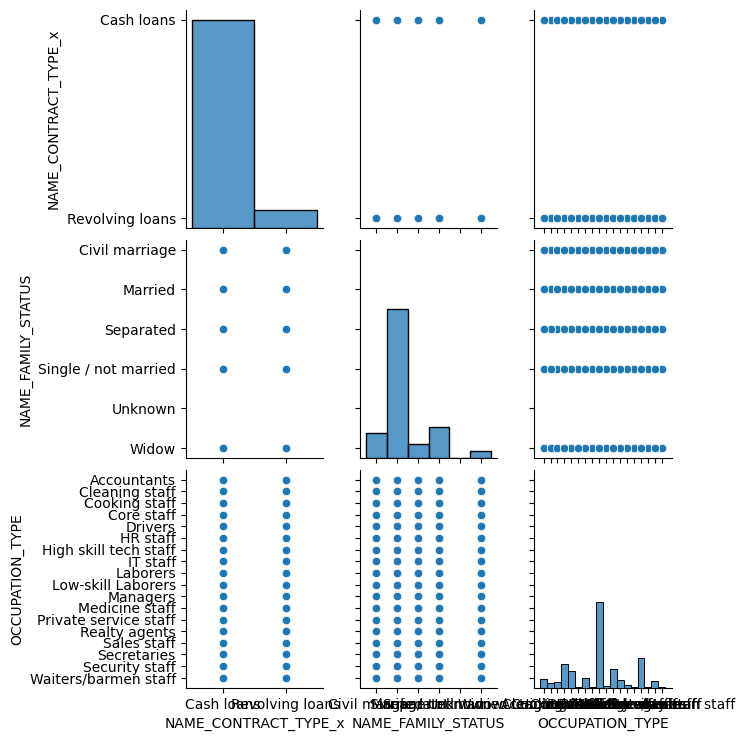

In [188]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df, vars=["NAME_CONTRACT_TYPE_x","NAME_FAMILY_STATUS","OCCUPATION_TYPE"])
plt.show()

In [189]:
#Inference:
#Married people are applying and taking loans more than the others.
#People are taking more loan in format of cash through the bank.
#Laborers are getting most refused and most approved loans. 
#Sales staff is also getting the second most refused and approved loans.

## Multivariate Analysis using Heatmap

### Correlation between different variables and targets 0 and 1

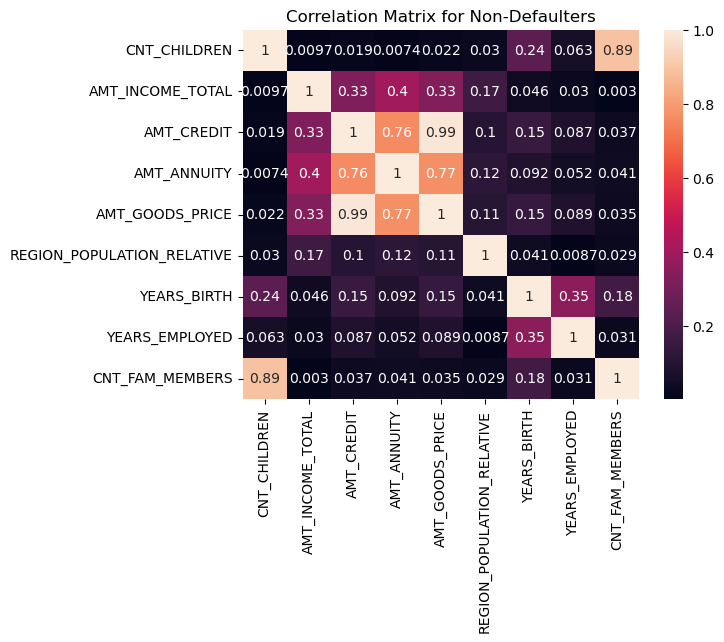

In [190]:
#Plotting Correlation matrix for numerical values in Target 0 dataset
numerical0=loan_target0[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                        'YEARS_BIRTH','YEARS_EMPLOYED','CNT_FAM_MEMBERS']]
sns.heatmap(numerical0.corr().abs(), annot=True)
plt.title("Correlation Matrix for Non-Defaulters")
plt.show()

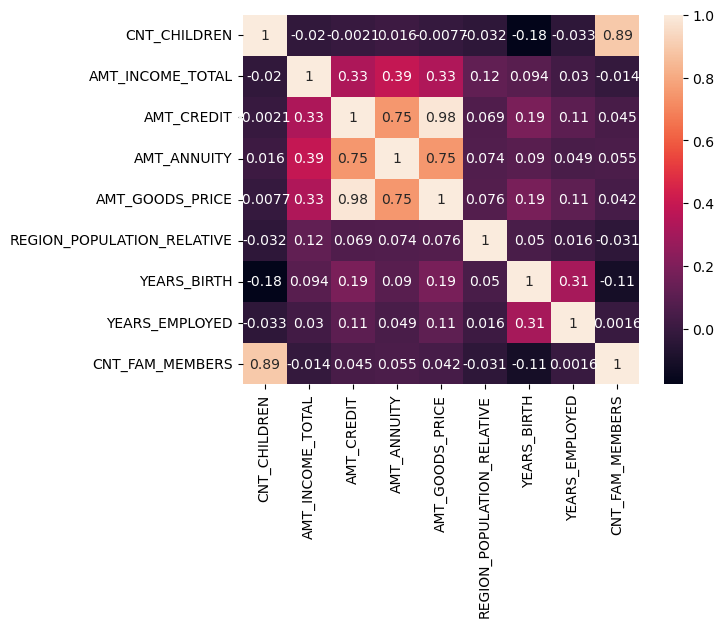

In [191]:
#Plotting Correlation matrix for numerical values in Target 1 dataset
numerical1=loan_target1[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                        'YEARS_BIRTH','YEARS_EMPLOYED','CNT_FAM_MEMBERS']]
sns.heatmap(numerical1.corr(), annot= True)
plt.show()

In [192]:
#Inference:
#Both for Target 0 and Target 1 some of the columns show high correlation values line AMT_GOODS_PRICE and AMT_CREDIT, 
#AMT_ANNUITY and AMT_CREDIT, AMT_ANNUITY and AMT_GOODS_PRICE, CNT_FAM_MEMBER and CNT_CHILDREN, AMT_ANNUITY and AMT_INCOME_TOTAL,
#AMT_INCOME_TOTAL and AMT_GOODS_PRICE.

#The credit amount is highly correlated with the goods price amount, and this correlation remains consistent among non-defaulters.
#The correlation between annuity and credit amount shows a slight reduction in defaulters when compared to non-defaulters.
#Non-defaulters exhibit a higher correlation with the years employed when compared to defaulters.


In [193]:
#Finding the top 10 correlations for Non-defaulters
corr_repayer = numerical0.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
38,AMT_GOODS_PRICE,AMT_CREDIT,0.986471
72,CNT_FAM_MEMBERS,CNT_CHILDREN,0.892962
39,AMT_GOODS_PRICE,AMT_ANNUITY,0.766653
29,AMT_ANNUITY,AMT_CREDIT,0.762101
28,AMT_ANNUITY,AMT_INCOME_TOTAL,0.400749
69,YEARS_EMPLOYED,YEARS_BIRTH,0.352660
37,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.333290
19,AMT_CREDIT,AMT_INCOME_TOTAL,0.326153
54,YEARS_BIRTH,CNT_CHILDREN,0.242847
78,CNT_FAM_MEMBERS,YEARS_BIRTH,0.178102


In [194]:
#Finding the top 10 correlations for Defaulters
corr_repayer = numerical1.corr()
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(bool)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
38,AMT_GOODS_PRICE,AMT_CREDIT,0.982464
72,CNT_FAM_MEMBERS,CNT_CHILDREN,0.893827
39,AMT_GOODS_PRICE,AMT_ANNUITY,0.748940
29,AMT_ANNUITY,AMT_CREDIT,0.748708
28,AMT_ANNUITY,AMT_INCOME_TOTAL,0.392953
37,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.331126
19,AMT_CREDIT,AMT_INCOME_TOTAL,0.327113
69,YEARS_EMPLOYED,YEARS_BIRTH,0.307012
56,YEARS_BIRTH,AMT_CREDIT,0.189513
58,YEARS_BIRTH,AMT_GOODS_PRICE,0.185450


## Conclusion

In [195]:
#1. Among canceled loans, if the bank can adjust the interest rate, then more customers may be attracted
#2. Among refused loans, the client has showed less tendencies to default payments for the new ones, so it is advisable to note 
#down the reason for refusal every time, because these clients may come back for more loans. 
#3. Applicants with good educatin background like an academic degree shows less trend in defaulting the payments.
#4. Students and businessmen shows higher rate of repayment.
#5. Applicants above 50 years and more working experience have less number of defaulters
#6. Also, male applicants are more among the defaulters.
#7. Applicants with bigger families and more number of children are more among defaulters.
